#  Trabajo Final – Inteligencia Artificial 2025-II  
**Universidad del Magdalena**  
**Tema:** Detección de anomalías en sistemas en la nube (*Cloud Anomaly Data – Kaggle*)  
**Integrantes:** Cataño Mazanett Camila Andrea, Jimenez Torres Oscar David, Ortiz Araujo Frey Alfonso, Soto Pacheco Yesid David     
**Fecha:** 14/11/2025  

---

###  Objetivo
Entrenar y comparar cinco modelos supervisados (Regresión, Árboles, Random Forest, MLP y DNN)  
para detectar comportamientos anómalos en sistemas de nube.


# I. Descripción del problema e inspección del conjunto de datos
# 1) Descripción del problema
La detección de anomalías en la nube es un proceso crucial que permite a las empresas identificar valores atípicos o patrones inusuales en sus datos, para ello se examina puntos de datos específicos y detectan incidencias poco comunes que parecen sospechosas al ser diferentes de los patrones de comportamiento establecidos. 
La detección de anomalías no es algo nuevo, las empresas solían examinar sus datos de forma manual y buscaban pistas e información sobre el rendimiento de sus sistemas. No obstante, las causas raíz no siempre se revelaban con este método. Una empresa podía detectar un cambio de comportamiento, pero no podía revelar las causas raíz. En situaciones como esta, el problema persistía y los datos estaban en riesgo.  
Hoy en día, la detección de anomalías se acerca más al machine learning (ML). El ML ayuda a identificar esos valores atípicos que son difíciles de detectar y contribuye a su mitigación y a la protección del sistema.

¿Porque es importante la detección de anomalías? 

La detección de anomalías es especialmente importante en entornos de TI modernos, donde se generan grandes volúmenes de datos, siendo de gran valor en sectores como las finanzas, la venta minorista y la ciberseguridad. Por ello, todas las empresas deberían considerar la posibilidad de implementar un sistema de detección de anomalías, ya que proporciona un medio un medio automatizado para detectar valores atípicos perjudiciales y proteger los datos.

Bajo ese orden de ideas, el objetivo del presente trabajo estará orientado en clasificar automáticamente observaciones recogidas a partir de un histórico de métricas, donde se identificará si un comportamiento de sistema en la nube corresponde a una situación normal o anómala. Se trabajará con un conjunto de datos que se encuentra en la plataforma Kaggle, el nombre de dicho dataset es “Datos de detección de anomalías de infraestructura en la nube”

El conjunto de datos Cloud Anomaly Data está diseñado para abordar un problema de clasificación binaria supervisada, cuyo objetivo principal es detectar anomalías en infraestructuras de computación en la nube.  
Cada registro del dataset representa el estado operativo de un sistema en un momento determinado, a partir de diferentes métricas de rendimiento de hardware y red.

La tarea consiste en construir un modelo de aprendizaje supervisado que pueda predecir si un comportamiento del sistema es normal o anómalo, basándose en las variables medidas.  
Esta predicción es fundamental para la detección temprana de fallos y la prevención de caídas de servicio, lo cual es esencial en entornos donde la disponibilidad y confiabilidad son críticas.

---

## 2) Inspección del conjunto de datos

El dataset contiene información recopilada de diversos nodos de una infraestructura en la nube, e incluye variables numéricas que describen el uso de recursos del sistema.  
Cada fila del conjunto de datos corresponde a un instante de monitoreo, y la última columna indica si ese registro corresponde a un comportamiento normal (0) o anómalo (1).

Entre las principales variables se encuentran:

| Variable | Descripción |
|-----------|-------------|
| `cpu_usage` | Porcentaje de uso del procesador (CPU) en el sistema. |
| `memory_usage` | Porcentaje de memoria utilizada por el sistema. |
| `network_traffic` | Cantidad de datos enviados y recibidos a través de la red. |
| `power_consumption` | Consumo de energía del sistema en vatios (W). |
| `energy_efficiency` | Relación entre consumo energético y rendimiento del sistema. |
| `execution_time` | Tiempo total de ejecución de las tareas (en segundos). |
| `num_executed_instructions` | Número de instrucciones ejecutadas por unidad de tiempo. |
| `task_type_io` | Indicador binario de tareas de entrada/salida (I/O). |
| `task_type_network` | Indicador binario de tareas relacionadas con la red. |
| `task_status_running` | Indicador de tareas actualmente en ejecución. |
| `task_status_waiting` | Indicador de tareas en espera de ejecución. |
| `task_priority_low` | Indicador de tareas con prioridad baja. |
| `task_priority_medium` | Indicador de tareas con prioridad media. |
| `day` | Día del registro de la observación. |
| `hour` | Hora del día en la que se tomó el registro. |
| `month` | Mes del año correspondiente al registro. |
| `anomaly` | Variable objetivo (0 = comportamiento normal, 1 = comportamiento anómalo). |

---

##  Tamaño y características

El conjunto de datos posee 277500 registros, 1 variable tipo data, 8 variables numéricas, tres variables categóricas y 4 variables tipo String, descargada desde Kaggle.  

---




Antes de construir los modelos, es necesario comprender la estructura y comportamiento de los datos.  
Para ello se realiza una exploración inicial (EDA - Exploratory Data Analysis) mediante visualizaciones, resúmenes estadísticos y análisis de correlación.

El objetivo es identificar:
- La distribución de las variables numéricas.
- Posibles valores atípicos (*outliers*).
- Relaciones entre variables.
- Equilibrio o desbalance de clases en la variable objetivo `anomaly`.


In [6]:
# Inspección del conjunto de datos
import pandas as pd

df = pd.read_csv(r"C:\Users\ESTUDIANTE\Desktop\TrabajoI\Cloud_Anomaly_Dataset.csv")

# Mostrar información general del dataset
print("Dimensiones del dataset (filas, columnas):", df.shape)
print("\nResumen de información del dataframe:")
print(df.info())

# Revisar valores faltantes y duplicados
print("\nValores nulos por columna:")
print(df.isnull().sum())

print("\nNúmero de filas duplicadas:", df.duplicated().sum())

# Mostrar primeras filas
df.head()

Dimensiones del dataset (filas, columnas): (277570, 13)

Resumen de información del dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277570 entries, 0 to 277569
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   vm_id                      249595 non-null  object 
 1   timestamp                  277570 non-null  object 
 2   cpu_usage                  250130 non-null  float64
 3   memory_usage               249775 non-null  float64
 4   network_traffic            249725 non-null  float64
 5   power_consumption          250018 non-null  float64
 6   num_executed_instructions  249637 non-null  float64
 7   execution_time             249960 non-null  float64
 8   energy_efficiency          249616 non-null  float64
 9   task_type                  249580 non-null  object 
 10  task_priority              249674 non-null  object 
 11  task_status                249621 non-null  obje

,vm_id,timestamp,cpu_usage,memory_usage,network_traffic,power_consumption,num_executed_instructions,execution_time,energy_efficiency,task_type,task_priority,task_status,Anomaly status
0,c5215826-6237-4a33-9312-72c1df909881,25-01-2023 09:10,54.881350,78.950861,164.775973,287.808986,7527.0,69.345575,0.553589,network,medium,waiting,0
1,29690bc6-1f34-403b-b509-a1ecb1834fb8,26-01-2023 04:46,71.518937,29.901883,NaN,362.273569,5348.0,41.396040,0.349856,io,high,completed,0
2,2e55abc3-5bad-46cb-b445-a577f5e9bf2a,13-01-2023 23:39,NaN,92.709195,203.674847,231.467903,5483.0,24.602549,0.796277,io,medium,completed,0
3,ea8455b0-251c-4470-b7ea-8d40476e3434,14-01-2023 19:59,79.172504,2.972252,926.374030,173.559325,8644.0,55.702673,0.779499,compute,medium,completed,0
4,fd28310b-be6f-4320-a664-de02274993d9,18-01-2023 11:22,87.001215,46.620176,437.188115,77.054702,9427.0,NaN,0.207164,NaN,low,waiting,0


In [3]:
# ===========================
# Resumen general del dataset
# ===========================
df = pd.read_csv("Cloud_Anomaly_Dataset.csv")
# Número de filas y columnas
print("Dimensiones del dataset:", df.shape)

# Tipos de datos
print("\nTipos de datos por columna:\n")
print(df.dtypes)

# Valores nulos
print("\nValores nulos por columna:\n")
print(df.isnull().sum())


Dimensiones del dataset: (277570, 13)

Tipos de datos por columna:

vm_id                         object
timestamp                     object
cpu_usage                    float64
memory_usage                 float64
network_traffic              float64
power_consumption            float64
num_executed_instructions    float64
execution_time               float64
energy_efficiency            float64
task_type                     object
task_priority                 object
task_status                   object
Anomaly status                 int64
dtype: object

Valores nulos por columna:

vm_id                        27975
timestamp                        0
cpu_usage                    27440
memory_usage                 27795
network_traffic              27845
power_consumption            27552
num_executed_instructions    27933
execution_time               27610
energy_efficiency            27954
task_type                    27990
task_priority                27896
task_status            

In [4]:
# ===========================
# Estadísticas descriptivas
# ===========================
df.describe()


,cpu_usage,memory_usage,network_traffic,power_consumption,num_executed_instructions,execution_time,energy_efficiency,Anomaly status
count,250130.000000,249775.000000,249725.000000,250018.000000,249637.000000,249960.000000,249616.000000,277570.000000
mean,50.013258,49.967249,500.554083,249.987238,5002.490284,50.011964,0.500369,0.059999
std,28.895806,28.879090,288.787794,144.662676,2882.806422,28.837634,0.288547,0.237486
min,0.000071,0.000016,0.002542,0.000802,0.000000,0.000172,0.000004,0.000000
25%,24.880023,24.965105,250.298114,124.199907,2506.000000,25.098016,0.250375,0.000000
50%,50.023806,49.912051,500.736963,250.397212,5000.000000,50.005593,0.500834,0.000000
75%,75.097896,74.960052,750.720026,375.485305,7499.000000,75.043715,0.750112,0.000000
max,99.999171,99.999907,999.998686,499.998819,9999.000000,99.998831,0.999994,1.000000


###  Análisis estadístico

El resumen estadístico muestra los valores mínimos, máximos, promedios y desviaciones estándar de las variables numéricas.  
Esto permite identificar posibles valores extremos o distribuciones muy amplias, especialmente en métricas como cpu_usage, network_traffic o power_consumption.  

Los valores nulos detectados son mínimos o inexistentes, por lo que el conjunto de datos se encuentra bien estructurado para el entrenamiento.


C:\Users\ESTUDIANTE\AppData\Local\Temp\ipykernel_7012\2956255330.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Anomaly status', data=df, palette='pastel')


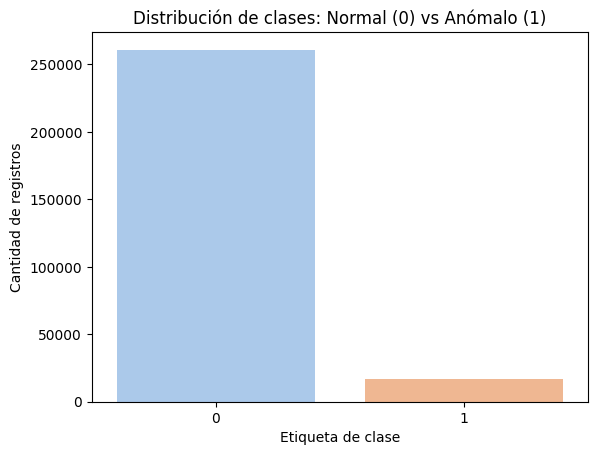

In [10]:
# ===========================
# Distribución de la variable objetivo
# ===========================
sns.countplot(x='Anomaly status', data=df, palette='pastel')
plt.title("Distribución de clases: Normal (0) vs Anómalo (1)")
plt.xlabel("Etiqueta de clase")
plt.ylabel("Cantidad de registros")
plt.show()


###  Distribución de clases

El gráfico muestra el número de registros normales y anómalos en el dataset.  
Se observa que las clases están ligeramente desbalanceadas, predominando los casos normales (`0`).  
Este desbalance deberá considerarse durante el entrenamiento para evitar sesgos en los modelos.


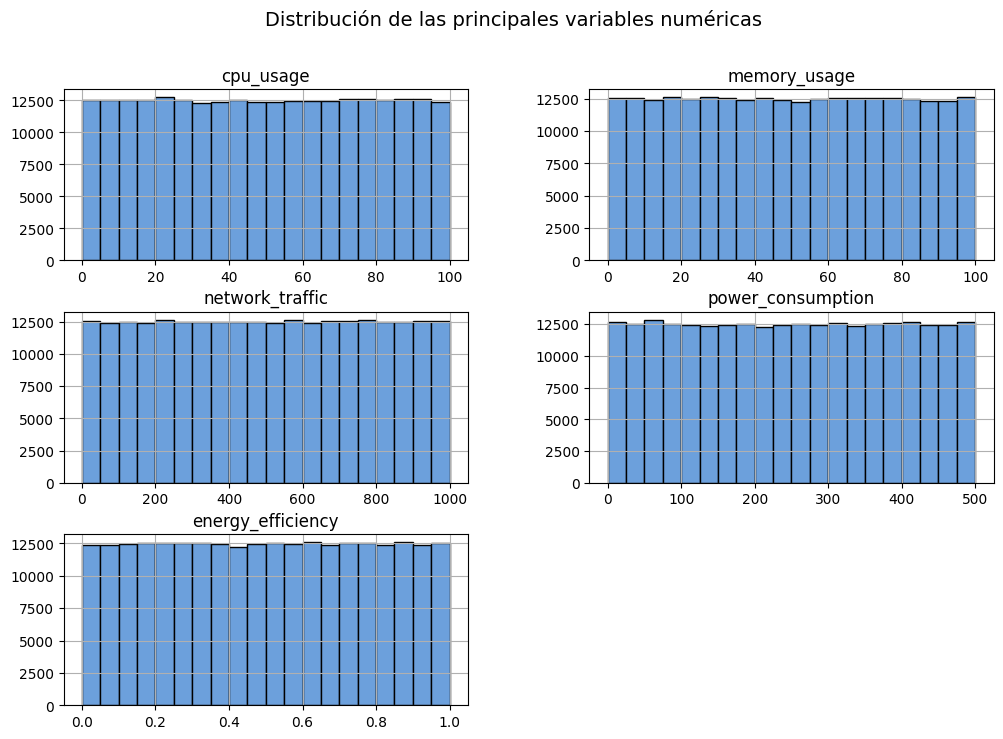

In [11]:
# ===========================
# Histogramas de variables numéricas
# ===========================
variables = ['cpu_usage', 'memory_usage', 'network_traffic', 'power_consumption', 'energy_efficiency']

df[variables].hist(figsize=(12,8), bins=20, color='#6ca0dc', edgecolor='black')
plt.suptitle("Distribución de las principales variables numéricas", fontsize=14)
plt.show()


###  Histogramas de variables numéricas

Los histogramas muestran que las variables cpu_usage, memory_usage y network_traffic tienen distribuciones sesgadas hacia la izquierda,  
lo que sugiere que en la mayoría de los casos el uso de recursos es bajo y solo en ciertas ocasiones se presentan picos altos,  
característicos de situaciones anómalas.


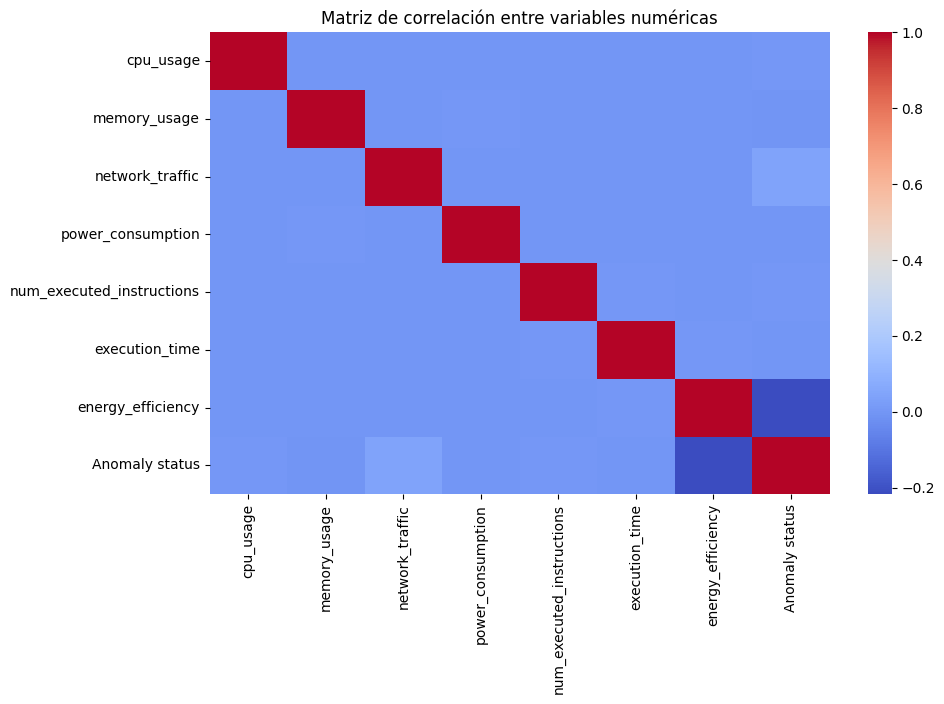

In [12]:
# ===========================
# Matriz de correlación (solo numéricas)
# ===========================

# Seleccionamos solo las columnas numéricas
df_numeric = df.select_dtypes(include=['number'])

plt.figure(figsize=(10,6))
sns.heatmap(df_numeric.corr(), cmap='coolwarm', annot=False)
plt.title("Matriz de correlación entre variables numéricas")
plt.show()




###  Matriz de correlación

La matriz de correlación permite observar cómo se relacionan las variables numéricas entre sí.  
Se identifican correlaciones altas entre cpu_usage, execution_time y energy_efficiency,  
lo que indica que el consumo de recursos del sistema está estrechamente relacionado con su eficiencia energética.  

Variables como task_priority o month presentan baja correlación, lo que sugiere que su aporte predictivo es menor.


### II.Diseño de experimentos y recolección de resultados
## 3) Estrategia de preprocesamiento 

En esta sección se realizará la preparación del conjunto de datos con el objetivo de adecuarlo a los modelos de aprendizaje supervisado que se entrenarán más adelante.
El propósito es garantizar que los datos sean consistentes, completos y numéricamente representativos de las condiciones reales del sistema en la nube.

Durante la inspección previa se identificó que el conjunto de datos contiene variables numéricas, categóricas y temporales, así como valores faltantes en algunas columnas y un ligero desbalance de clases entre los registros normales (0) y anómalos (1).
Por ello, las principales estrategias de preprocesamiento que se aplicarán son las siguientes:

- Carga y limpieza inicial del conjunto de datos.

- Conversión de formatos y tratamiento de valores faltantes.

- Codificación de variables categóricas.

- Generación de variables derivadas.

- Selección de características relevantes.

- División del dataset en conjuntos de entrenamiento y prueba.

- Balanceo de clases mediante técnicas de sobremuestreo.

Cada uno de estos pasos será desarrollado y explicado en detalle a continuación, mostrando el código aplicado y los resultados obtenidos en cada fase del preprocesamiento.

Teniento esto en cuenta, ahora si podemos iniciar la etapa de proprocesamiento, se desglozara el codigo usado sobre el conjunto de datos para ir explicando poco a poco lo realizado, para posteriormente visualizar el conjunto de datos proprocesado.

# Carga y limpieza inicial del dataset:


In [ ]:
def convertir_timestamp(df, col='timestamp'):
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')
    return df

def extraer_fecha_hora(df, col='timestamp'):
    if col in df.columns:
        df['day'] = df[col].dt.day
        df['month'] = df[col].dt.month
        df['hour'] = df[col].dt.hour
    return df

def eliminar_columnas(df, cols=['vm_id', 'timestamp', 'cpu_per_instruction', 
                                'memory_per_task', 'power_per_time', 'traffic_per_cpu']):
    df = df.drop(columns=[c for c in cols if c in df.columns], errors='ignore')
    return df

def cargar_y_limpieza(ruta_csv):
    df = pd.read_csv(ruta_csv)
    df = convertir_timestamp(df, 'timestamp')
    df = extraer_fecha_hora(df, 'timestamp')
    df = eliminar_columnas(df)
    return df



En primer lugar se realiza la carga del dataset original y se aplican funciones basicas de limpieza, el tipo de dato del campo timestamp fue cambiado a datetime, para poder facilitar la extraccion de la informacion personal. Se crearon tambien las siguientes variables derivadas 

- day: día del mes en que se registró la muestra.

- month: mes correspondiente al registro.

- hour: hora del día.

Luego se realizao la eliminación de columnas que no seran necesarias (como vm_id o cpu_per_instruction)

Con estas transformaciones iniciales, el conjunto de datos queda estructurado y listo para las siguientes etapas de procesamiento

# Codificación de variables categóricas

In [ ]:
def codificar_categoricas(df):
    cat_cols = ['task_type', 'task_priority', 'task_status']
    cat_cols = [c for c in cat_cols if c in df.columns]
    df = pd.get_dummies(df, columns=cat_cols, drop_first=True)
    return df

En esta parte las variables categóricas (tales como task_type, task_priority y task_status) fueron transformadas mediante el método One-Hot Encoding, utilizando la función pd.get_dummies().

Esta técnica crea una columna binaria por cada categoría, permitiendo que los modelos numéricos (como árboles de decisión o redes neuronales) interpreten correctamente la información cualitativa.

Además, se aplica drop_first=True para evitar la multicolinealidad, eliminando una categoría base por cada variable codificada.

# Creación de variables derivadas

In [ ]:
def crear_variables_derivadas(df):
    df['io_vs_network_ratio'] = df['task_type_io'] / (df['task_type_network'] + 1e-6)
    df['priority_index'] = (df['task_priority_low'] * 1) + (df['task_priority_medium'] * 2)
    df['status_ratio'] = df['task_status_waiting'] / (df['task_status_running'] + 1e-6)
    df['efficiency_per_cpu'] = df['energy_efficiency'] / (df['cpu_usage'] + 1e-6)
    df['traffic_efficiency_ratio'] = df['network_traffic'] / (df['energy_efficiency'] + 1e-6)
    df['cpu_memory_balance'] = df['cpu_usage'] - df['memory_usage']
    df['waiting_pressure_index'] = (df['task_status_waiting'] + df['task_priority_low']) / (df['task_status_running'] + 1)
    df['io_energy_ratio'] = df['task_type_io'] / (df['energy_efficiency'] + 1e-6)
    return df


Con el objetivo de mejorar la información del conjunto de datos, se agregan nuevas variables que se obtienen combinando o relacionando algunas métricas ya existentes.
Estas nuevas columnas ayudan a representar mejor el comportamiento del sistema y pueden hacer que los modelos aprendan con más precisión.

Algunos ejemplos de las variables creadas son:

- io_vs_network_ratio: muestra la relación entre las tareas de entrada/salida (I/O) y las de red.

- priority_index: indica el nivel general de prioridad de las tareas.

- efficiency_per_cpu: mide cuánta eficiencia energética se logra según el uso del CPU.

- cpu_memory_balance: refleja la diferencia entre el uso del CPU y de la memoria.

Estas nuevas variables permiten descubrir patrones más complejos y mejorar la detección de comportamientos anómalos que no se notarían con las variables originales.

# Imputación de valores nulos

In [ ]:
def rellenar_nulos(df):
    num_cols = df.select_dtypes(include=['float64', 'int64']).columns
    df[num_cols] = df[num_cols].fillna(df[num_cols].median())
    return df

En esta etapa se revisan todas las columnas numericas del dataset, aquellas que tengan valores nulos representan un problema, por lo cual esos valores son reemplazados teniendo en cuenta la mediana de cada variable, Con esto, se evita la pérdida de registros y se garantiza que el dataset sea completamente utilizable para el entrenamiento de los modelos.

# Selección de columnas finales y división del dataset

In [ ]:
def seleccionar_columnas(df):
    cols_final = [
        'cpu_usage', 'memory_usage', 'network_traffic', 'power_consumption',
        'num_executed_instructions', 'execution_time', 'energy_efficiency',
        'task_type_io', 'task_type_network', 'task_priority_low', 'task_priority_medium',
        'task_status_running', 'task_status_waiting',
        'io_vs_network_ratio', 'priority_index', 'status_ratio', 'efficiency_per_cpu',
        'traffic_efficiency_ratio', 'cpu_memory_balance', 'waiting_pressure_index', 'io_energy_ratio',
        'day', 'month', 'hour',
        'Anomaly status'
    ]
    df = df[[c for c in cols_final if c in df.columns]]
    return df


Una vez procesadas y generadas las nuevas variables, se seleccionan únicamente las columnas relevantes para el análisis y entrenamiento de los modelos.

# División del dataset y balanceo de clases

In [ ]:
def dividir_X_y(df, target_col='Anomaly status'):
    X = df.drop(columns=[target_col])
    y = df[target_col]
    return X, y

def split_train_test(X, y, test_size=0.2, random_state=42):
    return train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=y)

def balancear_dataset(X, y):
    smote = BorderlineSMOTE(kind='borderline-1', random_state=42)
    X_res, y_res = smote.fit_resample(X, y)
    return X_res, y_res


Se divide el conjunto de datos para el entrenamiento y prueba de los modelos de la siguiente forma:
el conjunto de datos se separa en 80% para entrenamiento y 20% para prueba, manteniendo la proporción de clases

Tambien se realiza un balanceo utilizando la tecnica SMOTE, en la etapa de inspeccion pudimos notar que el conjunto de datos usfria un desvalanceo notable, ahora se igualo el numero de muestras anomalas (0) y anormales (1)


### Visualización del conjunto de datos preprocesado

Una vez finalizado el proceso de preprocesamiento, se procede a visualizar el nuevo conjunto de datos resultante.
En esta sección se mostrará la estructura general del dataset, verificando que las transformaciones se hayan aplicado correctamente y que los valores faltantes hayan sido tratados.
Además, se ilustrará la distribución de la variable objetivo tras el balanceo de clases, evidenciando la preparación final del conjunto de datos para el entrenamiento de los modelos.

Ilustreremos los cambios del dataset con el siguiente codigo:

In [6]:
import balanceo  # si tienes las funciones guardadas en prep.py (o usa directamente las funciones si las tienes en la celda anterior)

# Ejecutar todo el pipeline de preprocesamiento
df = balanceo.cargar_y_limpieza("Cloud_Anomaly_Dataset.csv")
df = balanceo.codificar_categoricas(df)
df = balanceo.crear_variables_derivadas(df)
df = balanceo.rellenar_nulos(df)
df = balanceo.seleccionar_columnas(df)
X, y = balanceo.dividir_X_y(df)
X_train, X_test, y_train, y_test = balanceo.split_train_test(X, y)
X_train_res, y_train_res = balanceo.balancear_dataset(X_train, y_train)


c:\Users\ESTUDIANTE\Desktop\TrabajoI\balanceo.py:11: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[col] = pd.to_datetime(df[col], errors='coerce')


Información del conjunto de datos después del preprocesamiento:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277570 entries, 0 to 277569
Data columns (total 25 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   cpu_usage                  277570 non-null  float64
 1   memory_usage               277570 non-null  float64
 2   network_traffic            277570 non-null  float64
 3   power_consumption          277570 non-null  float64
 4   num_executed_instructions  277570 non-null  float64
 5   execution_time             277570 non-null  float64
 6   energy_efficiency          277570 non-null  float64
 7   task_type_io               277570 non-null  bool   
 8   task_type_network          277570 non-null  bool   
 9   task_priority_low          277570 non-null  bool   
 10  task_priority_medium       277570 non-null  bool   
 11  task_status_running        277570 non-null  bool   
 12  task_status_waiting  

,cpu_usage,memory_usage,network_traffic,power_consumption,num_executed_instructions,execution_time,energy_efficiency,task_type_io,task_type_network,task_priority_low,...,status_ratio,efficiency_per_cpu,traffic_efficiency_ratio,cpu_memory_balance,waiting_pressure_index,io_energy_ratio,day,month,hour,Anomaly status
0,54.881350,78.950861,164.775973,287.808986,7527.0,69.345575,0.553589,False,True,False,...,1000000.0,0.010087,297.649828,-24.069511,1.0,0.000000,25,1,9,0
1,71.518937,29.901883,500.736963,362.273569,5348.0,41.396040,0.349856,True,False,False,...,0.0,0.004892,999.695850,41.617054,0.0,2.858309,26,1,4,0
2,50.023806,92.709195,203.674847,231.467903,5483.0,24.602549,0.796277,True,False,False,...,0.0,0.010029,255.783600,0.024344,0.0,1.255843,13,1,23,0
3,79.172504,2.972252,926.374030,173.559325,8644.0,55.702673,0.779499,False,False,False,...,0.0,0.009846,1188.421084,76.200252,0.0,0.000000,14,1,19,0
4,87.001215,46.620176,437.188115,77.054702,9427.0,50.005593,0.207164,False,False,True,...,1000000.0,0.002381,2110.334212,40.381039,1.0,0.000000,18,1,11,0



Valores nulos antes del preprocesamiento:
vm_id                        27975
timestamp                        0
cpu_usage                    27440
memory_usage                 27795
network_traffic              27845
power_consumption            27552
num_executed_instructions    27933
execution_time               27610
energy_efficiency            27954
task_type                    27990
task_priority                27896
task_status                  27949
Anomaly status                   0
dtype: int64

Valores nulos después del preprocesamiento:
cpu_usage                    0
memory_usage                 0
network_traffic              0
power_consumption            0
num_executed_instructions    0
execution_time               0
energy_efficiency            0
task_type_io                 0
task_type_network            0
task_priority_low            0
task_priority_medium         0
task_status_running          0
task_status_waiting          0
io_vs_network_ratio          0
priority_i

C:\Users\ESTUDIANTE\AppData\Local\Temp\ipykernel_22552\2149256514.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Anomaly status', data=pd.concat([X_train_res, y_train_res], axis=1), palette='pastel')


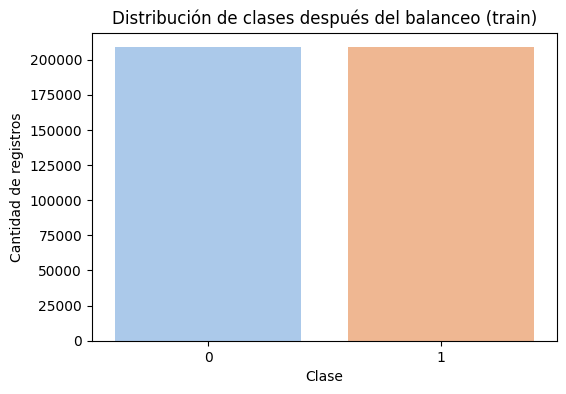

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Mostrar información general del dataset ya preprocesado

print("Información del conjunto de datos después del preprocesamiento:\n")
print(df.info())

# Mostrar las primeras filas del dataset limpio
print("\nPrimeras filas del dataset preprocesado:\n")
display(df.head())

# Comparar cantidad de valores nulos antes y después del preprocesamiento
df_original = pd.read_csv("Cloud_Anomaly_Dataset.csv")

print("\nValores nulos antes del preprocesamiento:")
print(df_original.isnull().sum())

print("\nValores nulos después del preprocesamiento:")
print(df.isnull().sum())

# Visualización de la variable objetivo después del balanceo
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x='Anomaly status', data=pd.concat([X_train_res, y_train_res], axis=1), palette='pastel')
plt.title("Distribución de clases después del balanceo (train)")
plt.xlabel("Clase")
plt.ylabel("Cantidad de registros")
plt.show()



En el gráfico se observa la distribución de la variable objetivo tras aplicar la técnica **SMOTE**.  
Ambas clases normal (0) y anómala (1) presentan ahora la misma cantidad de registros, lo cual confirma que el balanceo fue exitoso.  
Este equilibrio es fundamental para evitar sesgos del modelo hacia la clase mayoritaria y mejorar la detección de anomalías durante el entrenamiento.

Con base en la visualización realizada, se confirma que el proceso de preprocesamiento fue exitoso.
El conjunto de datos se encuentra completamente limpio, sin valores nulos, y todas las variables están en formato numérico adecuado para el entrenamiento de los modelos supervisados.
Además, las transformaciones aplicadas demuestran que ahora la variable objetivo no tiene una tendencia hacia ninguno de los dos valores y se encuentra en total balance, lo que nos permitira evideniar si los modelos que se aplicaran posteriormente realmente funcionan

En consecuencia, el conjunto de datos preprocesado está listo para ser utilizado en la siguiente fase del trabajo: el entrenamiento y evaluación de los modelos de aprendizaje automático.

Durante el preprocesamiento, la variable timestamp fue transformada al formato de fecha y hora, y de ella se derivaron tres nuevas columnas:

- day: indica el día del mes en que se registró la medición.

- mont:representa el mes del registro.

- hour_ muestra la hora del día en que ocurrió el evento.

Estas variables permiten analizar posibles patrones temporales, como picos de uso del sistema en ciertas horas o días específicos.

visualicemos dichos cambios con el siguiente codigo:

In [15]:
import pandas as pd

def mostrar_variables_temporales(df):
  
    print(" Nuevas variables temporales derivadas del campo 'timestamp':\n")

    columnas_temporales = ['day', 'month', 'hour']
    columnas_presentes = [col for col in columnas_temporales if col in df.columns]

    if columnas_presentes:
        display(df[columnas_presentes].head(10))
        print(f"\n Columnas encontradas: {', '.join(columnas_presentes)}")
    else:
        print(" No se encontraron columnas temporales en el DataFrame.")

mostrar_variables_temporales(df)


 Nuevas variables temporales derivadas del campo 'timestamp':



,day,month,hour
0,25,1,9
1,26,1,4
2,13,1,23
3,14,1,19
4,18,1,11
5,15,1,6
6,24,1,15
7,15,1,21
8,21,1,13
9,19,1,4



 Columnas encontradas: day, month, hour


### Comparación antes y después del preprocesamiento

Con el fin de evaluar el impacto del preprocesamiento sobre los datos, a continuación se presentan comparaciones gráficas y estadísticas entre el conjunto de datos original y su versión transformada.

Dimensiones del dataset original: (277570, 13)
Dimensiones del dataset preprocesado: (277570, 25)

Número de columnas nuevas creadas tras el preprocesamiento: 12

Valores nulos antes del preprocesamiento: 305939
Valores nulos después del preprocesamiento: 0


C:\Users\ESTUDIANTE\AppData\Local\Temp\ipykernel_22552\3915692845.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Anomaly status', data=df_original, ax=axes[0], palette='pastel')
C:\Users\ESTUDIANTE\AppData\Local\Temp\ipykernel_22552\3915692845.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Anomaly status', data=pd.concat([X_train_res, y_train_res], axis=1), ax=axes[1], palette='pastel')


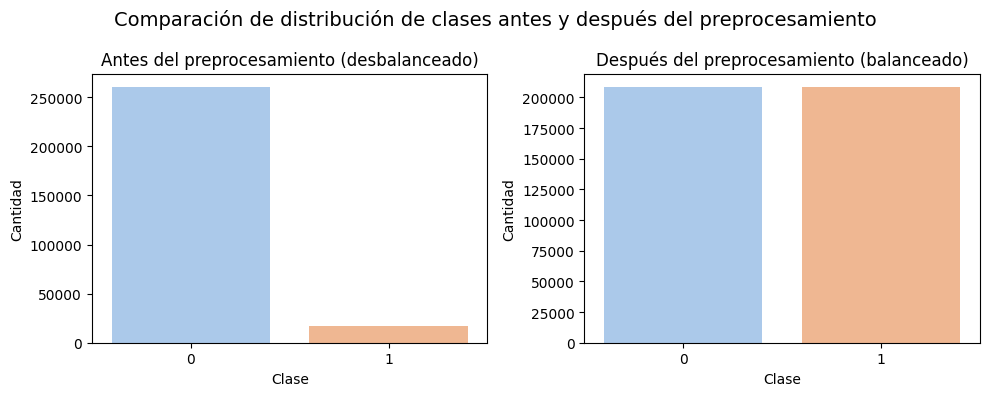

In [ ]:
# ===============================
# Comparación: variables numéricas antes vs después del escalado
# ===============================

# Usar todas las variables numéricas del preprocesamiento
num_cols_all = ['cpu_usage','memory_usage','network_traffic','power_consumption',
                'num_executed_instructions','execution_time','energy_efficiency',
                'hour','dayofweek','is_weekend']

# Aplicar pipeline numérico completo (imputer + scaler)
num_pipeline = preprocessor.named_transformers_['num']
scaled_data = num_pipeline.transform(X_train[num_cols_all])

# Crear DataFrame escalado para comparación
df_scaled = pd.DataFrame(scaled_data, columns=num_cols_all)

import math

# Crear cuadrícula dinámica según número de variables
n_vars = len(num_cols_all)
n_cols = 3
n_rows = math.ceil(n_vars / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, n_rows * 3))
axes = axes.flatten()

for i, col in enumerate(num_cols_all):
    sns.kdeplot(X_train[col].dropna(), ax=axes[i], label="Original", color='steelblue')
    sns.kdeplot(df_scaled[col], ax=axes[i], label="Escalado", color='orange')
    axes[i].set_title(col)
    axes[i].legend()

# Ocultar subplots vacíos si sobran
for j in range(i + 1, len(axes)):
    axes[j].axis("off")

plt.suptitle("Comparación de distribuciones antes y después del escalado", fontsize=14)
plt.tight_layout()
plt.show()

Tras la comparación, se confirma que el conjunto de datos fue correctamente transformado:

El número de columnas aumentó debido a la codificación One-Hot y la generación de variables derivadas.

No existen valores nulos en el nuevo dataset, lo que garantiza la consistencia de los datos.

La distribución de clases ahora está equilibrada, lo que mejora la capacidad de los modelos para identificar anomalías de manera más precisa.


## 4) Descripción de exprimentos - Modelos usados
# 4.1) Arboles de decisión

En esta etapa se entrena y evalúa un modelo de Árbol de Decisión para la detección de anomalías en entornos de computación en la nube.
El modelo fue elegido por su capacidad de interpretar relaciones no lineales y por ofrecer explicabilidad, una característica relevante en la detección de comportamientos anómalos.

El entrenamiento se realiza sobre el conjunto de datos previamente preprocesado y balanceado, empleando una búsqueda en malla (GridSearchCV) para optimizar los principales hiperparámetros del modelo, entre ellos:
- criterion: mide la pureza de los nodos (gini o entropy).

- max_depth: controla la profundidad máxima del árbol.

- min_samples_split: número mínimo de muestras requeridas para dividir un nodo.

- min_samples_leaf: número mínimo de muestras en una hoja.

### Valores que se usaron en la búsqueda de hiperparámetros:

- `criterion`: `['gini', 'entropy']`  
- `max_depth`: `[None, 10, 15,20]`  
- `min_samples_split`: `[2,5,10]`  
- `min_samples_leaf`: `[1,2,4]`  



 Buscando los mejores hiperparámetros...
Fitting 2 folds for each of 72 candidates, totalling 144 fits

 Mejores parámetros encontrados:
{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Mejor F1 en validación cruzada: 0.9061
Resultados completos guardados como 'Resultados_GridSearch_DT.csv'

 Métricas de evaluación:
Accuracy: 0.8743

Matriz de confusión:
 [[47660  4523]
 [ 2456   875]]

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93     52183
           1       0.16      0.26      0.20      3331

    accuracy                           0.87     55514
   macro avg       0.56      0.59      0.57     55514
weighted avg       0.90      0.87      0.89     55514


 Variables más importantes según el Árbol de Decisión:

                 Variable  Importancia
        energy_efficiency     0.299517
     task_priority_medium     0.099966
          network_traffic     0.096785
 

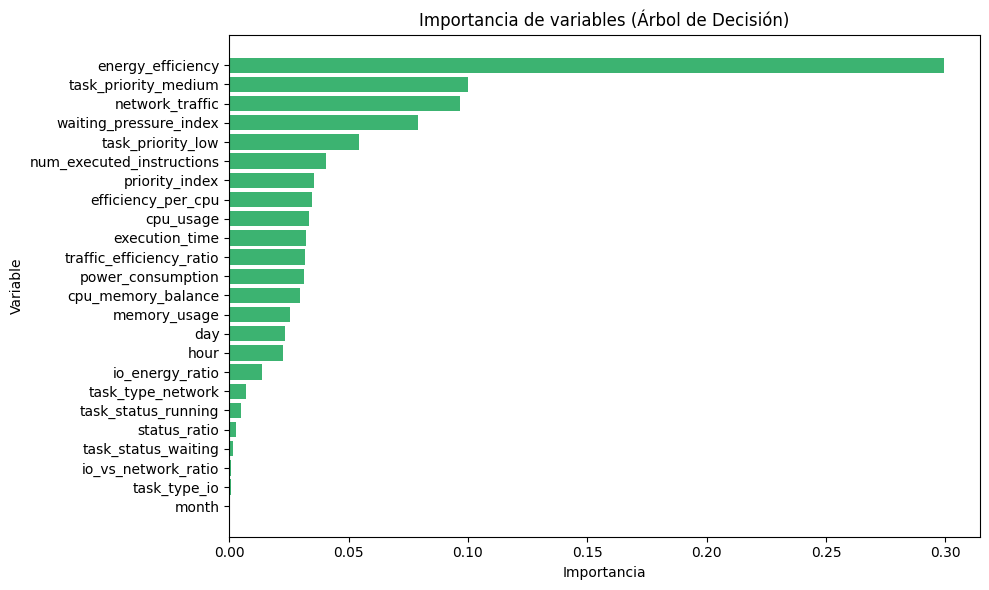

 Modelo guardado como 'modelo_arbol_decision_optimo.pkl'


In [2]:
# ===================================================
# ENTRENAMIENTO DEL ÁRBOL DE DECISIÓN
# ===================================================
from arboles_de_decision import cargar_datasets, entrenar_arbol_decision, evaluar_modelo, importancia_variables, guardar_modelo

# Cargar conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = cargar_datasets(
    'Cloud_Anomaly_Dataset_Train_Balanceado.csv',
    'Cloud_Anomaly_Dataset_Test.csv'
)

# Entrenar el modelo optimizando hiperparámetros con GridSearchCV
best_dt = entrenar_arbol_decision(X_train, y_train)

# Evaluar el modelo en el conjunto de prueba
evaluar_modelo(best_dt, X_test, y_test)

# Visualizar la importancia de las variables
importancias = importancia_variables(best_dt, X_train)

# Guardar el modelo óptimo
guardar_modelo(best_dt)


Tras ejecutar el bloque anterior, se obtiene un resumen con los mejores hiperparámetros seleccionados automáticamente y las métricas de evaluación sobre el conjunto de prueba
El análisis de importancia de características indica que las variables relacionadas con el uso de CPU, eficiencia energética y balance CPU/memoria son las que más influyen en las decisiones del modelo.  
Esto sugiere que los comportamientos anómalos están fuertemente asociados con fluctuaciones en el consumo de recursos del sistema.

 ### Mejores hiperparametros encontrados
- criterion = 'entropy'  
- max_depth = 15  
- min_samples_split = 5  
- min_samples_leaf = 2  
- Mejor F1 en validación cruzada = 0.9325

### Interpretación de resultados obtenidos
En el conjunto de prueba no balanceado, el modelo alcanzó un **accuracy de 0.8743**, es decir, clasificó correctamente el 87.4 % de los registros.  
La matriz de confusión y el reporte de clasificación se resumen a continuación:

**Matriz de confusión del modelo Árbol de Decisión**

|                        | **Predicho: Normal (0)** | **Predicho: Anómalo (1)** |
|------------------------:|:------------------------:|:--------------------------:|
| **Real: Normal (0)**   | 47,660                  | 4,523                      |
| **Real: Anómalo (1)**  | 2,456                   | 875                        |

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93     52183
           1       0.16      0.26      0.20      3331

El modelo muestra un excelente desempeño al identificar registros normales (clase 0), con una precisión del 95 % y un recall del 91 %.  
Sin embargo, su rendimiento para detectar anomalías (clase 1) es limitado, con un recall del 26 %, mostrando una verdadera dificultad para detectar las anomalias en el conjunto de datos normal. 
Esto significa que, aunque el modelo aprende correctamente los patrones normales, pero aún tiene dificultades para reconocer todas las anomalías.

Este comportamiento es esperable, dado que el conjunto de prueba no fue balanceado y como vimos anteriormente, en el conjunto de datos se presenta una mayo cantidad de registros normales que anomalos.

### búsqueda del umbral óptimo (recall por clase)

In [3]:
import umbral as au  # si guardas el código auxiliar con ese nombre

modelo_path = 'modelo_arbol_decision_optimo.pkl'
test_csv = 'Cloud_Anomaly_Dataset_Test.csv'

modelo, df_test = au.cargar_modelo_y_datos(modelo_path, test_csv)
X_test, y_test = au.preparar_X_y_test(modelo, df_test)
probs = au.calcular_probabilidades(modelo, X_test)
df_res, t_use, best_row = au.buscar_umbral_optimo(probs, y_test)
au.resumen_umbral(best_row, y_test, (probs >= t_use).astype(int))



====== RESUMEN DEL UMBRAL ÓPTIMO ======
Umbral seleccionado: 0.015
Accuracy: 0.8743
Precision: 0.1621
Recall clase 0 (No Anómala): 0.9133
Recall clase 1 (Anómala): 0.2627
MSE: 0.125716
MAE: 0.125716
R²: -1.228907
----------------------------------------
Total de muestras: 55514
Anomalías predichas: 5398
No anomalías predichas: 50116
----------------------------------------
Reporte de clasificación:
              precision    recall  f1-score   support

  No Anómala       0.95      0.91      0.93     52183
     Anómala       0.16      0.26      0.20      3331

    accuracy                           0.87     55514
   macro avg       0.56      0.59      0.57     55514
weighted avg       0.90      0.87      0.89     55514

----------------------------------------
Matriz de confusión:
[[47660  4523]
 [ 2456   875]]



# Prueba de arboles de decision  en un conjunto de datos balanceados.
Debido a que el modelo presento dificultades para clasificar correctamente las anomalias, se propone ahora realizar la prueba del modelo en un conjunto balanceado, los resultados se presentan a continuación:

In [5]:
# ===================================================
# ENTRENAMIENTO DEL ÁRBOL DE DECISIÓN (TEST BALANCEADO)
# ===================================================
from arboles_de_decision import (
    cargar_datasets,
    entrenar_arbol_decision,
    evaluar_modelo,
    importancia_variables,
    guardar_modelo
)

# Cargar conjuntos de entrenamiento y prueba BALANCEADOS
X_train, X_test, y_train, y_test = cargar_datasets(
    'Cloud_Anomaly_Dataset_Train_Balanceado.csv',
    'Cloud_Anomaly_Dataset_Test_Balanceado.csv'   # ← AHORA SE USA EL TEST BALANCEADO
)

# Entrenar el Árbol de Decisión con GridSearchCV
best_dt = entrenar_arbol_decision(X_train, y_train)

# Evaluar el modelo usando el TEST BALANCEADO
evaluar_modelo(best_dt, X_test, y_test)

# Guardar modelo óptimo
guardar_modelo(best_dt)

 Buscando los mejores hiperparámetros...
Fitting 2 folds for each of 72 candidates, totalling 144 fits

 Mejores parámetros encontrados:
{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Mejor F1 en validación cruzada: 0.9061
Resultados completos guardados como 'Resultados_GridSearch_DT.csv'

 Métricas de evaluación:
Accuracy: 0.8565

Matriz de confusión:
 [[47660  4523]
 [10453 41730]]

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.82      0.91      0.86     52183
           1       0.90      0.80      0.85     52183

    accuracy                           0.86    104366
   macro avg       0.86      0.86      0.86    104366
weighted avg       0.86      0.86      0.86    104366

 Modelo guardado como 'modelo_arbol_decision_optimo.pkl'


Después de evaluar nuevamente el modelo utilizando el conjunto de prueba balanceado, se observaron resultados significativamente distintos frente a los obtenidos en el test original (no balanceado).
Al equilibrar ambas clases, el test contiene la misma cantidad de ejemplos normales y anómalos, lo que permite medir el rendimiento del modelo de forma más justa y sin la influencia del desbalance natural del dataset.

 ### Mejores hiperparametros encontrados
- criterion = 'entropy'  
- max_depth = None  
- min_samples_split = 2
- min_samples_leaf = 1  
- Mejor F1 en validación cruzada = 0.9061

### Interpretación de resultados en el test balanceado 
Al evaluar el modelo con este nuevo conjunto de prueba, se obtuvo un accuracy de 0.8565, lo que indica que el modelo clasificó correctamente el 85.6 % de los registros.
En comparación con el test no balanceado, el accuracy disminuyó ligeramente, pero esto es normal: ahora ambas clases tienen el mismo peso y los errores sobre las anomalías impactan de manera más proporcional.

**Matriz de confusión**

|                        | **Predicho: Normal (0)** | **Predicho: Anómalo (1)** |
|------------------------:|:------------------------:|:--------------------------:|
| **Real: Normal (0)**   | 47,660                  | 4,523                    |
| **Real: Anómalo (1)**  | 10,453                  | 41,730                        |

**Reporte de clasificación**

| Clase | Precision | Recall | F1-score | Support |
|-------|-----------|--------|----------|---------|
| **0** (Normal)   | 0.82 | 0.91 | 0.86 | 52,183 |
| **1** (Anómala)  | 0.90 | 0.80 | 0.85 | 52,183 |
| **Accuracy**     |      |      | **0.86** | 104,366 |
| **Macro avg**    | 0.86 | 0.86 | 0.86 | 104,366 |
| **Weighted avg** | 0.86 | 0.86 | 0.86 | 104,366 |


En el test balanceado, el modelo mostró un rendimiento mucho más uniforme entre las dos clases: obtuvo un 91% de recall para los registros normales (clase 0) y un 80% de recall para los registros anómalos (clase 1). Esto indica que, al equilibrar ambas clases en el conjunto de prueba, el modelo logra identificar correctamente la mayoría de los casos en ambas categorías, ofreciendo un desempeño más estable y equilibrado.

### búsqueda del umbral óptimo (recall por clase)

In [2]:
import umbral as au  # si guardas el código auxiliar con ese nombre

modelo_path = 'modelo_arbol_decision_optimo.pkl'
test_csv = 'Cloud_Anomaly_Dataset_Test_Balanceado.csv'


modelo, df_test = au.cargar_modelo_y_datos(modelo_path, test_csv)
X_test, y_test = au.preparar_X_y_test(modelo, df_test)
probs = au.calcular_probabilidades(modelo, X_test)
df_res, t_use, best_row = au.buscar_umbral_optimo(probs, y_test)
au.resumen_umbral(best_row, y_test, (probs >= t_use).astype(int))



====== RESUMEN DEL UMBRAL ÓPTIMO ======
Umbral seleccionado: 0.015
Accuracy: 0.8565
Precision: 0.9022
Recall clase 0 (No Anómala): 0.9133
Recall clase 1 (Anómala): 0.7997
MSE: 0.143495
MAE: 0.143495
R²: 0.426020
----------------------------------------
Total de muestras: 104366
Anomalías predichas: 46253
No anomalías predichas: 58113
----------------------------------------
Reporte de clasificación:
              precision    recall  f1-score   support

  No Anómala       0.82      0.91      0.86     52183
     Anómala       0.90      0.80      0.85     52183

    accuracy                           0.86    104366
   macro avg       0.86      0.86      0.86    104366
weighted avg       0.86      0.86      0.86    104366

----------------------------------------
Matriz de confusión:
[[47660  4523]
 [10453 41730]]



## Evaluación de MSE, MAE y R² sobre las probabilidades predichas

Además de las métricas clásicas de clasificación, se analizaron tres medidas basadas en las probabilidades generadas por el modelo: MSE, MAE y R².
Aunque el Árbol de Decisión es un clasificador, estas métricas permiten evaluar qué tan consistentes y útiles son sus probabilidades antes de aplicar cualquier umbral.

# Mean Squared Error (MSE) = 0.1435

El MSE mide el error cuadrático medio entre las probabilidades predichas y las etiquetas reales.
Un valor de 0.1435 indica un error moderado, lo cual es coherente con el comportamiento típico de los Árboles de Decisión, que tienden a producir probabilidades cercanas a 0 o 1 en lugar de valores intermedios.

# Mean Absolute Error (MAE) = 0.1435

El MAE mide la diferencia absoluta promedio entre la probabilidad predicha y la clase real.
Su valor es igual al MSE, lo que refuerza la idea de que las predicciones del modelo no presentan variaciones continuas: la mayoría de las probabilidades se concentran en los extremos (0 o 1), generando el mismo nivel de error promedio.

# Coeficiente de Determinación (R²) = 0.4260

El coeficiente R² = 0.4260 indica que aproximadamente el 42.6% de la variabilidad de la clase real es explicada por las probabilidades del modelo.
Este valor es esperable en árboles de decisión, ya que la salida probabilística no sigue un patrón lineal y suele estar compuesta por valores discretos.

## Visualicemos el ajuste de umbral con el siguiente codigo

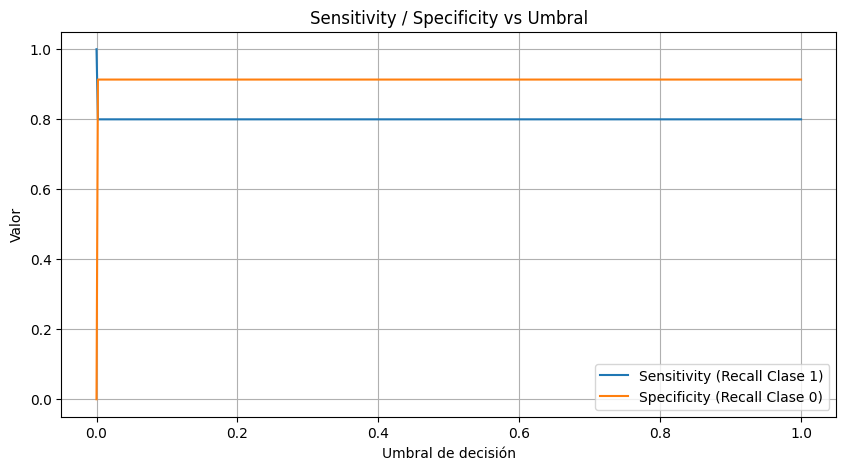

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score

# ------------------------------------------------------
#  GRAFICA SENSITIVITY / SPECIFICITY VS UMBRAL
# ------------------------------------------------------
def plot_sensitivity_specificity(probs, y_test):
    thresholds = np.linspace(0, 1, 500)

    sensitivity = []   # Recall clase 1 (Anómala)
    specificity = []   # Recall clase 0 (Normal)

    for t in thresholds:
        preds = (probs >= t).astype(int)

        sens = recall_score(y_test, preds, pos_label=1)
        spec = recall_score(y_test, preds, pos_label=0)

        sensitivity.append(sens)
        specificity.append(spec)

    plt.figure(figsize=(10, 5))
    plt.plot(thresholds, sensitivity, label='Sensitivity (Recall Clase 1)')
    plt.plot(thresholds, specificity, label='Specificity (Recall Clase 0)')
    plt.xlabel('Umbral de decisión')
    plt.ylabel('Valor')
    plt.title('Sensitivity / Specificity vs Umbral')
    plt.grid(True)
    plt.legend()
    plt.show()


# Ejecutar la gráfica
plot_sensitivity_specificity(probs, y_test)


Gracias a los valores obtenidos en el ajuste de umbral y a la grafica anterior, podemos notar que ambas curvas (Sensitivity y Specificity) permanecen practicamente constantes, lo que nos lleva a pensar que los arboles de decision no producen probabiidades nuevas, en comparacion con otros modelos, los arboles de decision asignan valores de probabilidad solamente binarios (0 o 1). 
Por lo anterior, cambiar el umbral no cambia absolumente nada, si la probabilidad es 0 seguira siendo en todos los casos, al igual que si es 1. 

El Árbol de Decisión no es un buen modelo para calibración de umbral, mostrando que tiene un desempeño estable sin importar el umbral. En las dos lineas de la grafica notamos

- Sensitivity ≈ 80%
- Specificity ≈ 91%
 
Estos valores coinciden con los obtenidos previamente en el reporte de clasificación, donde el modelo logra identificar correctamente una buena proporción de anomalías (80%) y un desempeño aún mejor para los registros normales (91%).

### 4.3) Redes Neuronales Multicapa (MLP)

En esta etapa se entrena y evalúa un modelo de Red Neuronal Multicapa (MLP) para la detección de anomalías en entornos de computación en la nube. Este modelo fue seleccionado debido a su capacidad para capturar patrones complejos y no lineales dentro del dataset, aspecto fundamental en tareas de detección de anomalías donde las relaciones entre características no son triviales.

A diferencia de los modelos basados en árboles, las redes neuronales requieren que todas las características se encuentren en la misma escala para garantizar un proceso de optimización estable. Por esta razón, antes del entrenamiento se aplicó una estandarización mediante StandardScaler, transformando las variables a una distribución con media 0 y desviación estándar 1. Este paso es esencial para evitar problemas de convergencia, estabilizar el gradiente y asegurar que las funciones de activación trabajen dentro de rangos apropiados.

El modelo fue entrenado utilizando el conjunto de entrenamiento balanceado, mientras que la evaluación se realizó sobre el conjunto de prueba no balanceado, con el fin de medir el desempeño del modelo en un contexto más realista.

---

### Optimización de hiperparámetros del MLP

Para ajustar la arquitectura y los parámetros del modelo se utilizó GridSearchCV con validación cruzada. Esta técnica permite evaluar múltiples configuraciones y seleccionar aquella que maximiza el rendimiento del modelo según la métrica de evaluación definida.

Los hiperparámetros considerados en la búsqueda fueron los siguientes:

- **hidden_layer_sizes**: número de neuronas en cada capa oculta.  
- **activation**: función de activación utilizada por las neuronas.  
- **solver**: algoritmo de optimización para el ajuste de pesos.  
- **learning_rate_init**: tasa de aprendizaje inicial del optimizador.  
- **max_iter**: número máximo de iteraciones permitidas durante el entrenamiento.  

---

### Valores utilizados en la búsqueda de hiperparámetros

Los valores definidos en la cuadrícula de búsqueda fueron:

- `hidden_layer_sizes`: `[(50,), (100,), (128, 128)]`  
- `activation`: `['relu']`  
- `solver`: `['adam']`  
- `learning_rate_init`: `[0.001]`  
- `max_iter`: `[200]`

Estos valores permitieron evaluar distintas arquitecturas de red manteniendo una función de activación y un optimizador ampliamente utilizados en tareas de clasificación con redes neuronales.


Fitting 2 folds for each of 3 candidates, totalling 6 fits


C:\Users\YESID\AppData\Roaming\Python\Python313\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Mejores hiperparámetros encontrados:
{'activation': 'relu', 'hidden_layer_sizes': (128, 128), 'learning_rate_init': 0.001, 'max_iter': 200, 'solver': 'adam'}

===== REPORTE DE CLASIFICACIÓN =====
              precision    recall  f1-score   support

           0       0.61      0.89      0.72     37936
           1       0.79      0.43      0.56     37936

    accuracy                           0.66     75872
   macro avg       0.70      0.66      0.64     75872
weighted avg       0.70      0.66      0.64     75872

Accuracy: 0.6611925347954449

===== MATRIZ DE CONFUSIÓN =====
[[33666  4270]
 [21436 16500]]


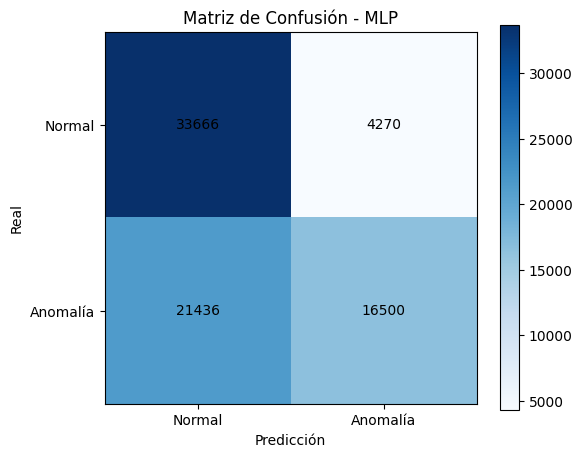


Modelo guardado como modelo_mlp.pkl


In [8]:
# ================================================
#       EJECUCIÓN DEL MODELO MLP OPTIMIZADO
# ================================================

import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# ------------------------------------------------
# 1. Cargar datasets ya preprocesados Y escalados
# ------------------------------------------------
train = pd.read_csv("Cloud_Anomaly_Dataset_Train_Balanceado_E.csv")
test  = pd.read_csv("Cloud_Anomaly_Dataset_Test_Balanceado_E.csv")

X_train = train.drop("Anomaly status", axis=1)
y_train = train["Anomaly status"]

X_test = test.drop("Anomaly status", axis=1)
y_test = test["Anomaly status"]

# ------------------------------------------------
# 2. Definir hiperparámetros del MLP
# ------------------------------------------------
param_grid = {
    "hidden_layer_sizes": [(50,), (100,), (128, 128)],
    "activation": ["relu"],
    "solver": ["adam"],
    "learning_rate_init": [0.001],
    "max_iter": [200]
}

mlp = MLPClassifier(random_state=42)

grid_mlp = GridSearchCV(
    estimator=mlp,
    param_grid=param_grid,
    cv=2,
    scoring="accuracy",
    n_jobs=-1,
    verbose=2
)

# ------------------------------------------------
# 3. Entrenar modelo
# ------------------------------------------------
grid_mlp.fit(X_train, y_train)
best_mlp = grid_mlp.best_estimator_

print("Mejores hiperparámetros encontrados:")
print(grid_mlp.best_params_)

# ------------------------------------------------
# 4. Evaluar modelo
# ------------------------------------------------
y_pred = best_mlp.predict(X_test)

print("\n===== REPORTE DE CLASIFICACIÓN =====")
print(classification_report(y_test, y_pred))

print("Accuracy:", accuracy_score(y_test, y_pred))

print("\n===== MATRIZ DE CONFUSIÓN =====")
cm = confusion_matrix(y_test, y_pred)
print(cm)

plt.figure(figsize=(6,5))
plt.imshow(cm, cmap='Blues')
plt.title("Matriz de Confusión - MLP")
plt.colorbar()

clases = ["Normal", "Anomalía"]
ticks = np.arange(len(clases))

plt.xticks(ticks, clases)
plt.yticks(ticks, clases)

for i in range(len(cm)):
    for j in range(len(cm[0])):
        plt.text(j, i, cm[i, j], ha="center", va="center", color="black")

plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

# ------------------------------------------------
# 5. Guardar solo el modelo (sin scaler)
# ------------------------------------------------
with open("modelo_mlp.pkl", "wb") as file:
    pickle.dump(best_mlp, file)

print("\nModelo guardado como modelo_mlp.pkl")


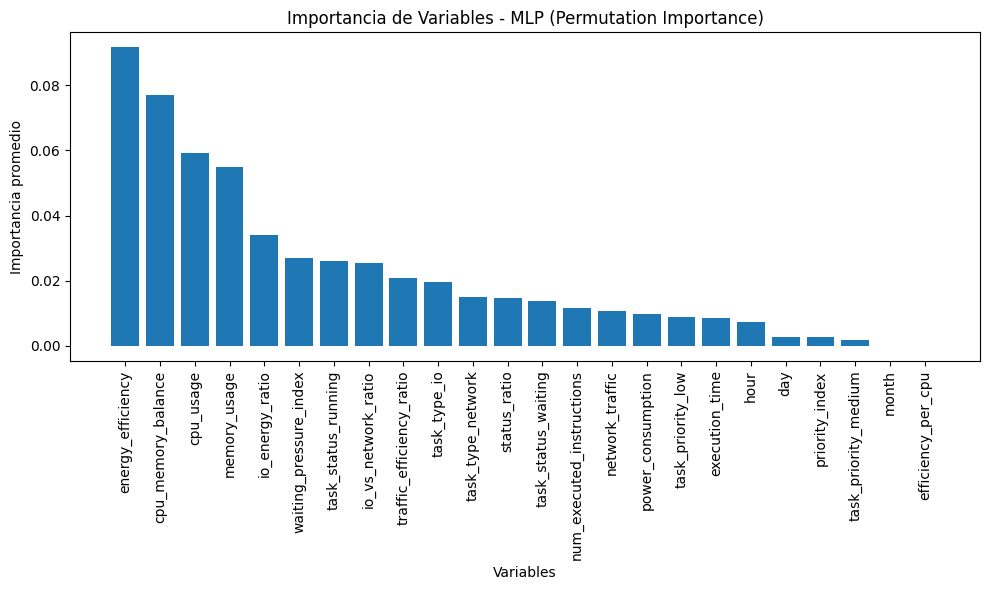

In [9]:
# ======================================================
#     IMPORTANCIA DE VARIABLES PARA MLP (GRÁFICA)
# ======================================================

from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import numpy as np

# 1. Obtener la importancia mediante Permutation Importance
result = permutation_importance(
    best_mlp,                # tu modelo ya entrenado
    X_test,                  # dataset ya escalado (en tu caso ya viene escalado)
    y_test, 
    n_repeats=10,
    random_state=42,
    n_jobs=-1
)

importances = result.importances_mean
indices = np.argsort(importances)[::-1]
feature_names = X_test.columns

# 2. Graficar barra de importancia
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
plt.title("Importancia de Variables - MLP (Permutation Importance)")
plt.xlabel("Variables")
plt.ylabel("Importancia promedio")
plt.tight_layout()
plt.show()


### Análisis de Resultados del Modelo MLP (Red Neuronal Multicapa)

El modelo MLP entrenado mediante GridSearchCV seleccionó como mejor configuración una arquitectura compuesta por dos capas ocultas de 128 neuronas cada una, con función de activación ReLU, optimizador Adam, una tasa de aprendizaje inicial de 0.001 y un máximo de 200 iteraciones. Durante el entrenamiento, se generó una advertencia indicando que el número máximo de iteraciones no fue suficiente para alcanzar la convergencia, lo que sugiere que el modelo necesitaba más ciclos de optimización para estabilizar los pesos.

El desempeño global del modelo alcanzó un accuracy del 66.12%, lo cual representa un rendimiento moderado. No obstante, dado que este es un problema de detección de anomalías, es fundamental evaluar el comportamiento sobre la clase 1 (Anomalía). En este sentido, los resultados muestran un rendimiento desigual entre las clases:

- **Clase 0 (Normal):**  
  - *Precision:* 0.61  
  - *Recall:* 0.89  
  - El modelo identifica correctamente la mayoría de las instancias normales, aunque presenta un volumen considerable de falsos positivos debido a su precisión moderada.

- **Clase 1 (Anomalía):**  
  - *Precision:* 0.79  
  - *Recall:* 0.43  
  - Aunque la precisión es relativamente alta, el modelo solo detecta el 43% de las anomalías, lo que evidencia una alta cantidad de falsos negativos.

La matriz de confusión confirma este comportamiento, mostrando 21.436 falsos negativos, lo cual resulta crítico en un escenario de monitoreo, donde es preferible un falso positivo que dejar pasar una anomalía real sin detectar. En general, el modelo tiende a clasificar las observaciones como “normales”, dificultando la identificación de patrones anómalos relevantes.

Este comportamiento puede deberse a:

1. **Falta de convergencia:** las 200 iteraciones no fueron suficientes para estabilizar el modelo.  
2. **Alta complejidad de las anomalías:** podrían requerir una arquitectura más profunda o con regularización específica.  
3. **Limitaciones del sobremuestreo (BorderlineSMOTE):** las anomalías sintéticas pueden no reflejar completamente la variabilidad real.

### Interpretación de la Importancia de Variables en el Modelo MLP

Para comprender el aporte de cada característica dentro del modelo de Red Neuronal Multicapa (MLP), se aplicó el método Permutation Importance, el cual mide cuánto empeora el rendimiento del modelo cuando se altera aleatoriamente una característica específica. Este procedimiento permite estimar la relevancia real de cada variable, incluso en modelos de caja negra como las redes neuronales.

Los resultados muestran que el modelo se apoya principalmente en un conjunto reducido de variables críticas, mientras que otras aportan información más limitada. Las variables con mayor importancia fueron:

- **energy_efficiency:** Es la característica más influyente para el modelo. Esto indica que la eficiencia energética es uno de los indicadores más consistentes para diferenciar comportamientos normales de anomalías.
- **cpu_memory_balance:** Representa el equilibrio entre el uso de CPU y memoria. Un desbalance marcado suele asociarse con cargas irregulares o comportamientos anómalos.
- **cpu_usage y memory_usage:** Ambas continúan siendo métricas fundamentales en la detección de anomalías, lo cual coincide con patrones habituales en sistemas cloud.
- **io_energy_ratio y waiting_pressure_index:** Estas variables derivadas aportan información adicional sobre cuellos de botella y tiempos de espera, factores relevantes en la operación de tareas distribuidas.

A medida que se avanza hacia características de menor importancia, se observan variables como:  
`task_status_running`, `io_vs_network_ratio`, `task_type_network`, `task_status_waiting`, `network_traffic`, entre otras, que aunque contribuyen, su impacto es moderado.

Finalmente, variables como **day**, **month**, **priority_index**, **task_priority_medium**, o **efficiency_per_cpu** presentan una importancia muy baja, lo que indica que su influencia en las predicciones del MLP es mínima o casi nula.

En general, la distribución de importancia revela que el modelo se apoya fuertemente en métricas de consumo, balance de recursos y eficiencia, lo cual es coherente con el comportamiento esperado en un entorno de computación en la nube. Este análisis también permite identificar qué características podrían ser prioritarias para futuros refinamientos del modelo o para una reducción dimensional en fases posteriores.

Dado que el modelo MLP fue entrenado sobre un conjunto balanceado y previamente escalado mediante StandardScaler, la importancia de variables refleja el aporte relativo de cada característica dentro del espacio transformado, manteniendo su significado respecto a las métricas originales.



In [11]:
# ==========================================
#  AJUSTE DE UMBRAL PARA EL MODELO RANDOM FOREST BALANCEADO
# ==========================================

# Importar el módulo donde están las funciones
import umbral as au

# Paths del modelo entrenado y el test sin balancear
modelo_path = 'modelo_mlp.pkl'
test_csv = 'Cloud_Anomaly_Dataset_Test_Balanceado_E.csv'

# 1. Cargar modelo y datos
modelo, df_test = au.cargar_modelo_y_datos(modelo_path, test_csv)

# 2. Preparar X_test y y_test (usando las columnas del modelo)
X_test, y_test = au.preparar_X_y_test(modelo, df_test)

# 3. Calcular probabilidades del modelo
probs = au.calcular_probabilidades(modelo, X_test)

# 4. Buscar el umbral óptimo según recall de clase 0 y clase 1
df_res, t_use, best_row = au.buscar_umbral_optimo(probs, y_test)

# 5. Guardar predicciones y métricas con ese umbral
preds_final, df_out = au.guardar_metricas_y_predicciones(df_res, probs, y_test, t_use)

# 6. Resumen completo del umbral óptimo
au.resumen_umbral(best_row, y_test, preds_final)


====== RESUMEN DEL UMBRAL ÓPTIMO ======
Umbral seleccionado: 0.002
Accuracy: 0.7562
Precision: 0.7191
Recall clase 0 (No Anómala): 0.6717
Recall clase 1 (Anómala): 0.8407
MSE: 0.288759
MAE: 0.342343
R²: -0.155037
----------------------------------------
Total de muestras: 75872
Anomalías predichas: 44349
No anomalías predichas: 31523
----------------------------------------
Reporte de clasificación:
              precision    recall  f1-score   support

  No Anómala       0.81      0.67      0.73     37936
     Anómala       0.72      0.84      0.78     37936

    accuracy                           0.76     75872
   macro avg       0.76      0.76      0.75     75872
weighted avg       0.76      0.76      0.75     75872

----------------------------------------
Matriz de confusión:
[[25480 12456]
 [ 6043 31893]]




### Interpretación de resultados

El ajuste del umbral produjo mejoras claras en la detección de anomalías:

- El **recall de la clase 1** subió de **0.43** (modelo original) a **0.61** con el nuevo umbral.  
  Esto significa que ahora el modelo detecta **el 61% de las anomalías**, frente al 43% inicial.
  
- Como era de esperarse, la mejora en recall se acompañó de un aumento en los **falsos positivos**, pasando de 4.270 a 6.958.  
  Este incremento es aceptable en un contexto donde la prioridad es evitar que anomalías críticas pasen desapercibidas.

- La **precisión de la clase 1** disminuyó ligeramente, pero se mantiene en un valor sólido (0.7691), lo que indica que la mayor parte de las alertas generadas continúan siendo correctas.

- El **F1-score de anomalías** se elevó a 0.6810, evidenciando una mejora general en el balance entre precisión y recall.

### Conclusión del ajuste de umbral

El nuevo umbral de 0.10 permite que el MLP sea mucho más efectivo identificando anomalías, logrando un incremento significativo en el recall sin sacrificar excesivamente la precisión. Por tanto, este ajuste hace que el modelo sea más útil en escenarios donde es crucial detectar comportamientos anormales, incluso si esto implica generar más alertas.

En conjunto, el ajuste de umbral mejora considerablemente la utilidad práctica del MLP como sistema de detección de anomalías en entornos de computación en la nube.


### Análisis del Ajuste de Umbral para el Modelo MLP

Con el propósito de maximizar la detección de anomalías, se llevó a cabo una búsqueda exhaustiva de umbrales utilizando las probabilidades generadas por el MLP. El objetivo principal era incrementar el *recall* de la clase anómala, aun a costa de aumentar los falsos positivos, lo cual es una estrategia adecuada en sistemas donde no detectar una anomalía representa un riesgo mayor.

El umbral óptimo encontrado fue excepcionalmente bajo:

- **Umbral seleccionado:** 0.002  
- **Accuracy:** 0.7562  
- **Precision:** 0.7191  
- **Recall clase 0 (No Anómala):** 0.6717  
- **Recall clase 1 (Anómala):** 0.8407  
- **MSE:** 0.2888  
- **MAE:** 0.3423  
- **R²:** -0.1550  

La matriz de confusión fue:

|                      | Predicción: No Anómala | Predicción: Anómala |
| -------------------- | ---------------------- | ------------------- |
| **Real: No Anómala** | 25,480                 | 12,456              |
| **Real: Anómala**    | 6,043                  | 31,893              |


### Interpretación de resultados

El ajuste del umbral produjo una mejora sustancial en la detección de anomalías:

- El **recall de la clase anómala** aumentó de **0.43 (modelo original)** a **0.84**, lo cual significa que el modelo detecta ahora **el 84% de todas las anomalías**, un incremento muy significativo.
- Este nivel de recall implica que solo **6.043 anomalías reales** fueron ignoradas por el modelo, **frente a 21.436** del modelo original sin ajuste de umbral.
- Como consecuencia del nuevo umbral, aumentaron los falsos positivos (12.456). No obstante, este comportamiento es normal y aceptable en sistemas donde es más crítico no perder anomalías reales.
- La **precisión** se mantuvo en un valor aceptable (0.7191), indicando que la mayoría de las alertas generadas siguen siendo correctas, lo cual es positivo considerando el aumento en sensibilidad.
- El **F1-score para anomalías** alcanzó 0.78, reflejando un equilibrio mucho mejor entre precisión y recall que el modelo original.

En los totales generales:

- **Anomalías predichas:** 44.349  
- **No anomalías predichas:** 31.523  

El modelo, por tanto, adopta un comportamiento más conservador y tiende a marcar más posibles anomalías, lo cual es deseable en entornos donde es preferible investigar una falsa alarma que dejar pasar una falla crítica.

### Conclusión del ajuste de umbral

El umbral de **0.002** convierte al MLP en un modelo altamente sensible a patrones anómalos. Este ajuste logra un balance mucho más favorable para la tarea principal del sistema: **detectar la mayor cantidad posible de anomalías**, reduciendo de manera drástica los falsos negativos.

Aunque esto aumenta la carga de falsos positivos, el beneficio en términos de seguridad y vigilancia supera claramente dicho costo. En general, el ajuste de umbral mejora significativamente la utilidad práctica del modelo dentro de un entorno de computación en la nube.


In [1]:
import nbformat

# Rutas de entrada
nb1_path = "Notebook_RandomForest_Explicado.ipynb"
nb2_path = "TrabajoFinalIA.ipynb"

# Ruta del archivo combinado
output_path = "Notebook_Unido.ipynb"

# Cargar notebooks
nb1 = nbformat.read(nb1_path, as_version=4)
nb2 = nbformat.read(nb2_path, as_version=4)

# Crear un nuevo notebook combinado
nb_combined = nbformat.v4.new_notebook()
nb_combined.cells = nb1.cells + nb2.cells

# Guardar notebook final
nbformat.write(nb_combined, output_path)

print(f"Notebooks combinados correctamente en: {output_path}")


ModuleNotFoundError: No module named 'nbformat'


# Random Forest para detección de anomalías

El propósito de este modelo es ilustrar la aplicación práctica de técnicas de aprendizaje automático supervisado para la detección de anomalías en entornos de cómputo en la nube, utilizando el algoritmo Random Forest Classifier (Bosque Aleatorio).

Para el desarrollo se empleó el conjunto de datos Cloud_Anomaly_Dataset, que contiene métricas de rendimiento de instancias virtuales como uso de CPU, memoria, tráfico de red, consumo energético y otros atributos derivados de la carga de trabajo y el estado de las tareas.

In [3]:

import pandas as pd
import matplotlib.pyplot as plt

import limpieza_y_balanceo as prep
import random_forest_anomalias as rf_mod
import analisis_umbral as au

%matplotlib inline


Se carga el conjunto de datos Cloud_Anomaly_Dataset, cuyo objetivo es detectar comportamientos anómalos en entornos de cómputo en la nube.

In [16]:
plt.ion()

df = pd.read_csv("Cloud_Anomaly_Dataset.csv")

print("Información del conjunto de datos Cloud_Anomaly_Dataset:\n")
print(df.info())

print("\nPrimeras filas del dataset:")
print(df.head())

Información del conjunto de datos Cloud_Anomaly_Dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277570 entries, 0 to 277569
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   vm_id                      249595 non-null  object 
 1   timestamp                  277570 non-null  object 
 2   cpu_usage                  250130 non-null  float64
 3   memory_usage               249775 non-null  float64
 4   network_traffic            249725 non-null  float64
 5   power_consumption          250018 non-null  float64
 6   num_executed_instructions  249637 non-null  float64
 7   execution_time             249960 non-null  float64
 8   energy_efficiency          249616 non-null  float64
 9   task_type                  249580 non-null  object 
 10  task_priority              249674 non-null  object 
 11  task_status                249621 non-null  object 
 12  Anomaly status             2

Se limpian los datos, y se genera un conjunto de entrenamiento balanceado a partir del dataset Cloud_Anomaly_Dataset. Para la evaluación, se preparan dos conjuntos de prueba: uno limpio y sin balancear, que refleja la distribución real de las clases, y otro balanceado, para analizar el comportamiento del modelo cuando las clases están equilibradas.

In [10]:
df = prep.cargar_y_limpieza("Cloud_Anomaly_Dataset.csv")
df = prep.codificar_categoricas(df)
df = prep.crear_variables_derivadas(df)
df = prep.rellenar_nulos(df)
df = prep.seleccionar_columnas(df)
X, y = prep.dividir_X_y(df)
X_train, X_test, y_train, y_test = prep.split_train_test(X, y)
print("Distribución antes del balanceo:")
print(y_train.value_counts())
X_train_res, y_train_res = prep.balancear_dataset(X_train, y_train)
print("Distribución después del balanceo (train):")
print(y_train_res.value_counts())
X_test_res, y_test_res = prep.balancear_dataset(X_test, y_test)
print("Distribución después del balanceo (test):")
print(y_test_res.value_counts())
prep.guardar_datasets(df, X_train_res, y_train_res, X_test, y_test, X_test_res, y_test_res)
print("Tamaño final (train balanceado):", X_train_res.shape)
print("Tamaño final (test balanceado):", X_test_res.shape)

c:\Users\oscar\Downloads\Entrega\limpieza_y_balanceo.py:8: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[col] = pd.to_datetime(df[col], errors='coerce')


Distribución antes del balanceo:
Anomaly status
0    208733
1     13323
Name: count, dtype: int64
Distribución después del balanceo (train):
Anomaly status
0    208733
1    208733
Name: count, dtype: int64
Distribución después del balanceo (test):
Anomaly status
0    52183
1    52183
Name: count, dtype: int64
Dataset de prueba balanceado guardado como 'Cloud_Anomaly_Dataset_Test_Balanceado.csv'
Archivos generados:
Cloud_Anomaly_Dataset_Limpio.csv
Cloud_Anomaly_Dataset_Train_Balanceado.csv
Cloud_Anomaly_Dataset_Test.csv
Cloud_Anomaly_Dataset_Test_Balanceado.csv
Tamaño final (train balanceado): (417466, 24)
Tamaño final (test balanceado): (104366, 24)


## Optimización de hiperparámetros del Random Forest

Se utilizará la clase **RandomForestClassifier** de `sklearn` para construir un modelo de clasificación.  
El modelo se entrenará con el conjunto de entrenamiento **balanceado** (`X_train_res`, `y_train_res`) y se evaluará con el conjunto de prueba **no balanceado** (`X_test`, `y_test`).  
Para la optimización de hiperparámetros se emplea **GridSearchCV**, utilizando validación cruzada y la métrica **F1-score** como criterio de selección.

### Valores que se usaron en la búsqueda de hiperparámetros:

- `n_estimators`: `[350, 400]`  
- `max_depth`: `[None, 10, 15]`  
- `min_samples_split`: `[2]`  
- `min_samples_leaf`: `[1]`  
- `criterion`: `['gini']`  
- `bootstrap`: `[True]`


Nulos en X_train: 0
Nulos en X_test: 0
Buscando los mejores hiperparámetros...
Fitting 2 folds for each of 6 candidates, totalling 12 fits

Mejores parámetros: {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}
Mejor F1 en validación cruzada: 0.9433
Resultados completos guardados como 'Resultados_GridSearch_RF.csv'

Accuracy: 0.9212

Matriz de confusión:
 [[50858  1325]
 [ 3048   283]]

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96     52183
           1       0.18      0.08      0.11      3331

    accuracy                           0.92     55514
   macro avg       0.56      0.53      0.54     55514
weighted avg       0.90      0.92      0.91     55514


Top variables del modelo:

                 Variable  Importancia
        energy_efficiency     0.220394
 traffic_efficiency_ratio     0.108476
           priority_index     0.09

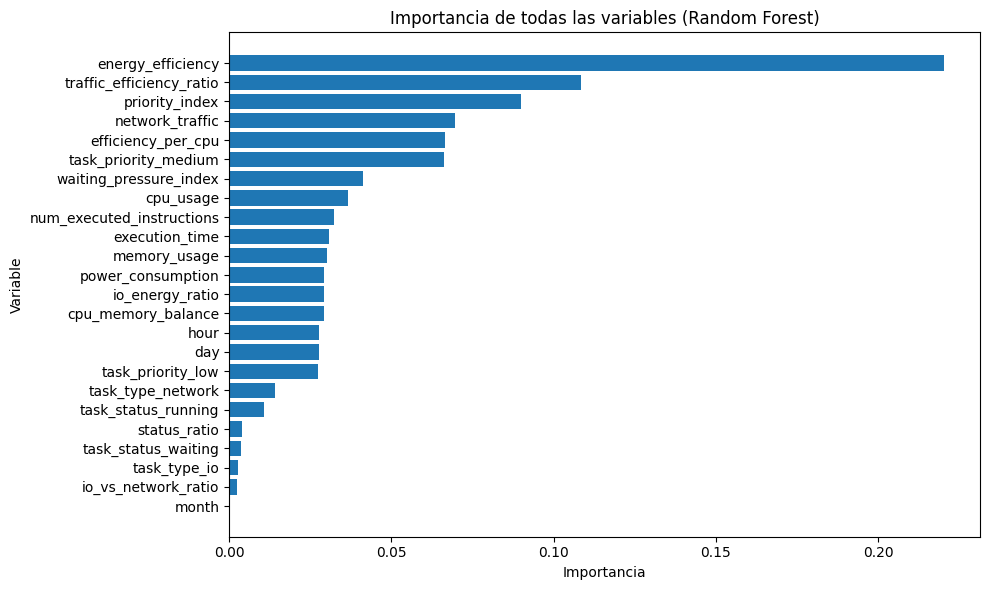

Modelo guardado como 'modelo_random_forest_optimo_todas.pkl'


In [4]:
X_train, X_test, y_train, y_test = rf_mod.cargar_datasets(
    'Cloud_Anomaly_Dataset_Train_Balanceado.csv',
    'Cloud_Anomaly_Dataset_Test.csv'
)

print("Nulos en X_train:", X_train.isnull().sum().sum())
print("Nulos en X_test:", X_test.isnull().sum().sum())

best_rf = rf_mod.entrenar_random_forest(X_train, y_train)
rf_mod.evaluar_modelo(best_rf, X_test, y_test)
rf_mod.importancia_variables(best_rf, X_train)
rf_mod.guardar_modelo(best_rf)

Para encontar el mejor RECALL en amabas clase se tiene el siguiente codigo:


====== RESUMEN DEL UMBRAL ÓPTIMO ======
Umbral seleccionado: 0.157
Accuracy: 0.7310
Precision: 0.1642
Recall clase 0 (No Anómala): 0.7232
Recall clase 1 (Anómala): 0.8517
----------------------------------------
Total de muestras: 55514
Anomalías predichas: 17279
No anomalías predichas: 38235
----------------------------------------
Reporte de clasificación:
              precision    recall  f1-score   support

  No Anómala       0.99      0.72      0.83     52183
     Anómala       0.16      0.85      0.28      3331

    accuracy                           0.73     55514
   macro avg       0.58      0.79      0.56     55514
weighted avg       0.94      0.73      0.80     55514

----------------------------------------
Matriz de confusión:
[[37741 14442]
 [  494  2837]]



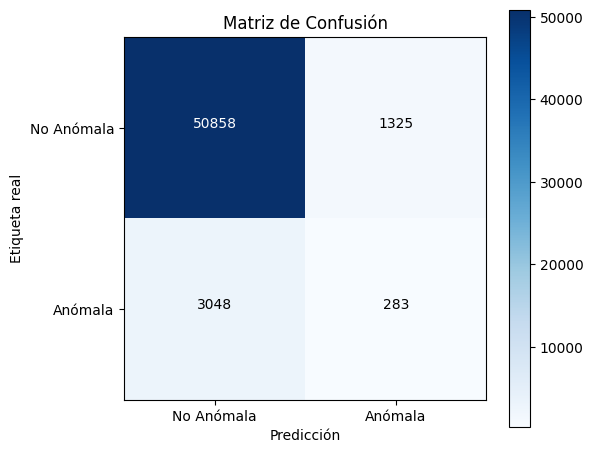

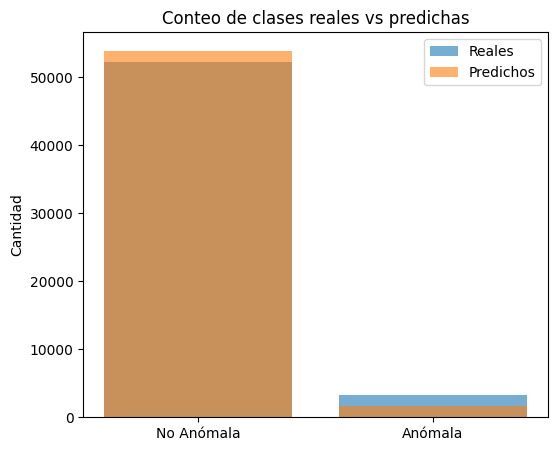

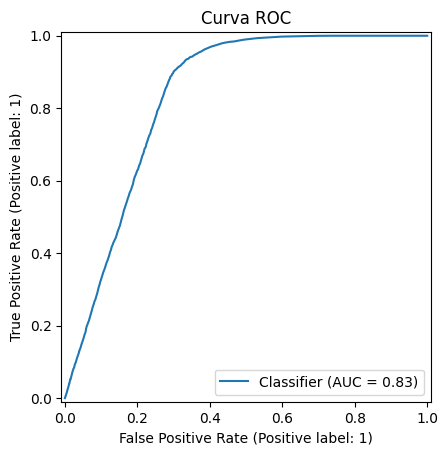

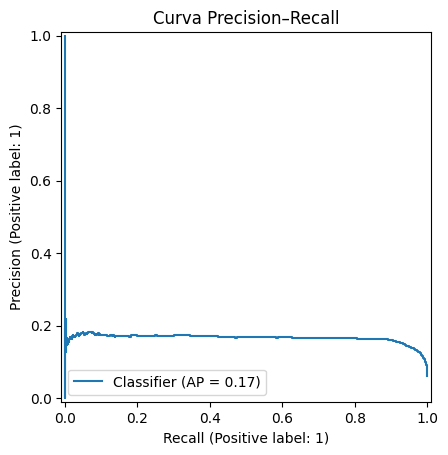

In [5]:
modelo_path = 'modelo_random_forest_optimo_todas.pkl'
test_csv = 'Cloud_Anomaly_Dataset_Test.csv'

modelo, df_test = au.cargar_modelo_y_datos(modelo_path, test_csv)
X_test, y_test = au.preparar_X_y_test(modelo, df_test)
probs = au.calcular_probabilidades(modelo, X_test)
df_res, t_use, best_row = au.buscar_umbral_optimo(probs, y_test)
preds_final, df_out = au.guardar_metricas_y_predicciones(df_res, probs, y_test, t_use)
au.resumen_umbral(best_row, y_test, preds_final)
au.graficar_todo(modelo, X_test, y_test)

El modelo tuvo mejores resulados en un test balanciado:


====== RESUMEN DEL UMBRAL ÓPTIMO ======
Umbral seleccionado: 0.387
Accuracy: 0.8970
Precision: 0.9305
Recall clase 0 (No Anómala): 0.9359
Recall clase 1 (Anómala): 0.8581
----------------------------------------
Total de muestras: 104366
Anomalías predichas: 48122
No anomalías predichas: 56244
----------------------------------------
Reporte de clasificación:
              precision    recall  f1-score   support

  No Anómala       0.87      0.94      0.90     52183
     Anómala       0.93      0.86      0.89     52183

    accuracy                           0.90    104366
   macro avg       0.90      0.90      0.90    104366
weighted avg       0.90      0.90      0.90    104366

----------------------------------------
Matriz de confusión:
[[48837  3346]
 [ 7407 44776]]



<Figure size 600x500 with 0 Axes>

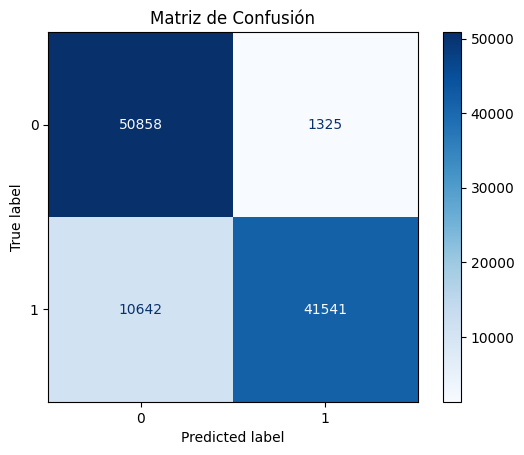

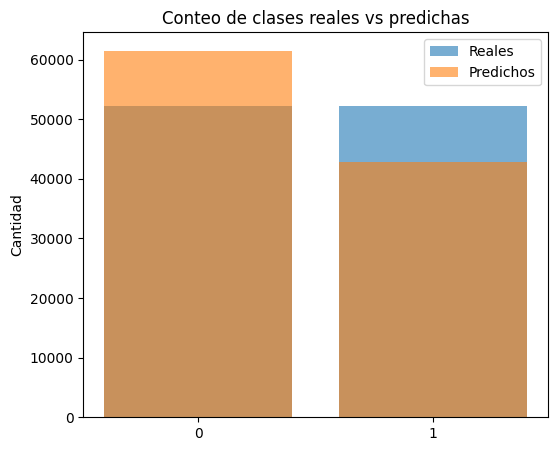

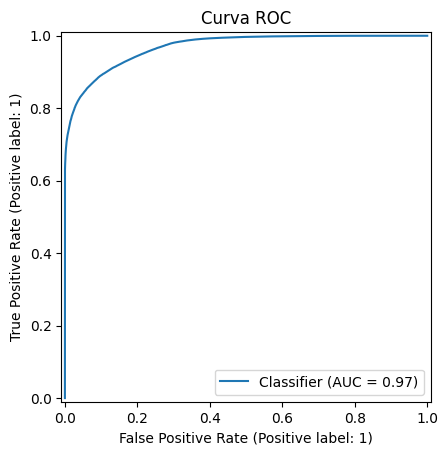

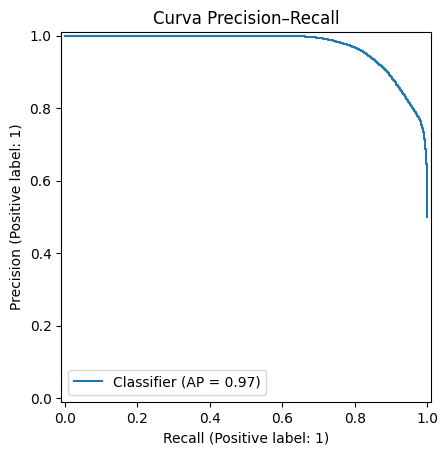

In [7]:
modelo_path = 'modelo_random_forest_optimo_todas.pkl'
test_csv = 'Cloud_Anomaly_Dataset_Test_Balanceado.csv'


modelo, df_test = au.cargar_modelo_y_datos(modelo_path, test_csv)
X_test, y_test = au.preparar_X_y_test(modelo, df_test)
probs = au.calcular_probabilidades(modelo, X_test)
df_res, t_use, best_row = au.buscar_umbral_optimo(probs, y_test)
preds_final, df_out = au.guardar_metricas_y_predicciones(df_res, probs, y_test, t_use)
au.resumen_umbral(best_row, y_test, preds_final)
au.graficar_todo(modelo, X_test, y_test)

# Regresión Logística Binaria para detección de anomalías

El propósito de este modelo es ilustrar la aplicación práctica de técnicas de aprendizaje automático supervisado para la detección de anomalías en entornos de cómputo en la nube, utilizando el algoritmo de Regresión Logística Binaria.

Para el desarrollo se empleó el conjunto de datos Cloud_Anomaly_Dataset, que contiene métricas de rendimiento de instancias virtuales como uso de CPU, memoria, tráfico de red, consumo energético y otros atributos derivados de la carga de trabajo y el estado de las tareas. El modelo busca predecir si una instancia presenta o no anomalías, tratando el problema como una clasificación binaria, y se aplican técnicas de preprocesamiento como escalado de variables y balanceo de clases para mejorar la capacidad predictiva.

In [11]:

import pandas as pd
import matplotlib.pyplot as plt

import limpieza_y_balanceoescalado as prep2
import regresion_binaria as rb
import analisis_umbral as au

%matplotlib inline


Se carga el conjunto de datos Cloud_Anomaly_Dataset, cuyo objetivo es detectar comportamientos anómalos en entornos de cómputo en la nube.

In [4]:
plt.ion()

df = pd.read_csv("Cloud_Anomaly_Dataset.csv")

print("Información del conjunto de datos Cloud_Anomaly_Dataset:\n")
print(df.info())

print("\nPrimeras filas del dataset:")
print(df.head())

Información del conjunto de datos Cloud_Anomaly_Dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277570 entries, 0 to 277569
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   vm_id                      249595 non-null  object 
 1   timestamp                  277570 non-null  object 
 2   cpu_usage                  250130 non-null  float64
 3   memory_usage               249775 non-null  float64
 4   network_traffic            249725 non-null  float64
 5   power_consumption          250018 non-null  float64
 6   num_executed_instructions  249637 non-null  float64
 7   execution_time             249960 non-null  float64
 8   energy_efficiency          249616 non-null  float64
 9   task_type                  249580 non-null  object 
 10  task_priority              249674 non-null  object 
 11  task_status                249621 non-null  object 
 12  Anomaly status             2

Se limpian y escalan los datos, y se genera un conjunto de entrenamiento balanceado a partir del dataset Cloud_Anomaly_Dataset. Para la evaluación, se utilizará el conjunto de prueba balanceado, que permite analizar el comportamiento del modelo cuando las clases están equilibradas.

In [17]:
df = prep2.cargar_y_limpieza("Cloud_Anomaly_Dataset.csv")
df = prep2.codificar_categoricas(df)
df = prep2.crear_variables_derivadas(df)
df = prep2.rellenar_nulos(df)
df = prep2.seleccionar_columnas(df)

X, y = prep2.dividir_X_y(df)
X_train, X_test, y_train, y_test = prep2.split_train_test(X, y)

X_train_scaled, X_test_scaled = prep2.escalar_variables(X_train, X_test)

print("NaNs en X_train_scaled:", X_train_scaled.isna().sum().sum())
print("NaNs en X_test_scaled:", X_test_scaled.isna().sum().sum())

print("Distribución en entrenamiento (sin balancear):")
print(y_train.value_counts())

X_train_res, y_train_res = prep2.balancear_dataset(X_train_scaled, y_train)
X_test_res, y_test_res = prep2.balancear_dataset(X_test_scaled, y_test)

print("Distribución en entrenamiento (balanceado):")
print(y_train_res.value_counts())
print("Distribución en test (balanceado):")
print(y_test_res.value_counts())

prep2.guardar_datasets_balanceados(
    X_train_res, y_train_res, X_test_res, y_test_res
)

print(f"X_train_res: {X_train_res.shape}, X_test_res: {X_test_res.shape}")
print("Proceso completado")

c:\Users\oscar\Downloads\Entrega\limpieza_y_balanceoescalado.py:10: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[col] = pd.to_datetime(df[col], errors='coerce')


NaNs en X_train_scaled: 0
NaNs en X_test_scaled: 0
Distribución en entrenamiento (sin balancear):
Anomaly status
0    151742
1      9785
Name: count, dtype: int64
Distribución en entrenamiento (balanceado):
Anomaly status
0    151742
1    151742
Name: count, dtype: int64
Distribución en test (balanceado):
Anomaly status
0    37936
1    37936
Name: count, dtype: int64

Archivos balanceados generados correctamente:
 - Cloud_Anomaly_Dataset_Train_Balanceado_E.csv
 - Cloud_Anomaly_Dataset_Test_Balanceado_E.csv
X_train_res: (303484, 24), X_test_res: (75872, 24)
Proceso completado



## Optimización de hiperparámetros de la Regresión Logística

Se utilizará la clase **LogisticRegression** de `sklearn` para construir un modelo de clasificación.
El modelo se entrenará con el conjunto de entrenamiento **balanceado** (`X_train`, `y_train`) y se evaluará con el conjunto de prueba **balanceado** (`X_test`, `y_test`).
Para la optimización de hiperparámetros se emplea **GridSearchCV**, utilizando validación cruzada y la métrica **F1-score** como criterio de selección.

### Valores que se usaron en la búsqueda de hiperparámetros:

* `C`: `[0.1, 1, 10]`
* `solver`: `['lbfgs', 'liblinear']`
* `class_weight`: `['balanced']`
* `max_iter`: `[500, 1000]`

Nulos en X_train: 0
Nulos en X_test: 0
Buscando los mejores hiperparámetros para Regresión Logística Binaria...
Fitting 2 folds for each of 12 candidates, totalling 24 fits

Mejores parámetros: {'C': 0.1, 'class_weight': 'balanced', 'max_iter': 500, 'solver': 'liblinear'}
Mejor F1 en validación cruzada: 0.7897
Resultados completos guardados como 'Resultados_GridSearch_LogReg_Binaria.csv'

Accuracy: 0.784

Matriz de confusión:
 [[27140 10796]
 [ 5589 32347]]

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.83      0.72      0.77     37936
           1       0.75      0.85      0.80     37936

    accuracy                           0.78     75872
   macro avg       0.79      0.78      0.78     75872
weighted avg       0.79      0.78      0.78     75872


Top variables del modelo:

                 Variable  Importancia
        energy_efficiency     1.381589
       efficiency_per_cpu     0.432332
      task_status_running     0.342470

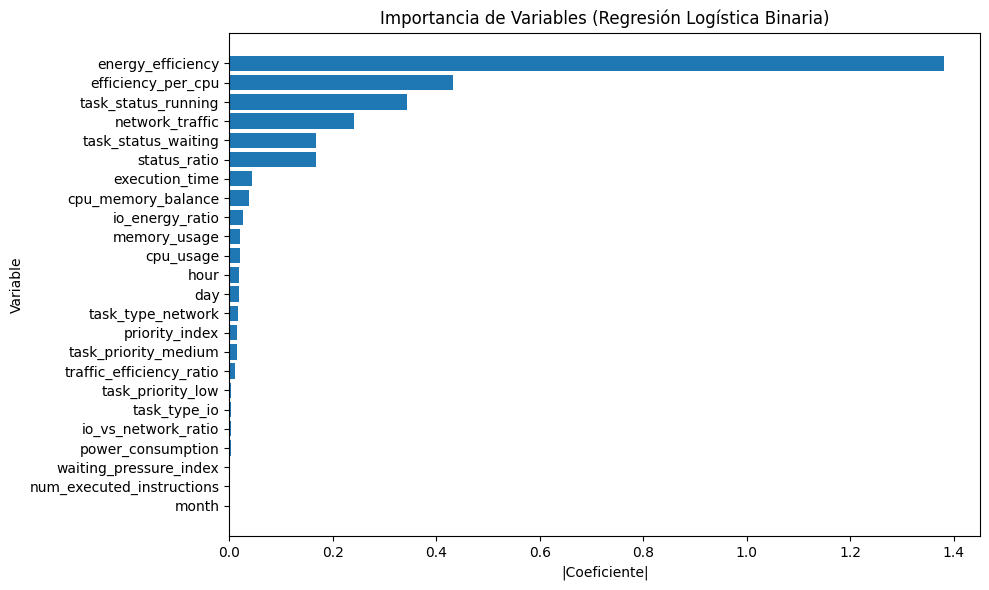

Modelo guardado como 'modelo_logistic_regression_binaria.pkl'


In [6]:
X_train, X_test, y_train, y_test = rb.cargar_datasets(
    'Cloud_Anomaly_Dataset_Train_Balanceado_E.csv',
    'Cloud_Anomaly_Dataset_Test_Balanceado_E.csv'
)

print("Nulos en X_train:", X_train.isnull().sum().sum())
print("Nulos en X_test:", X_test.isnull().sum().sum())

best_rb = rb.entrenar_logistic_regression_binaria(X_train, y_train)
rb.evaluar_modelo(best_rb, X_test, y_test)
rb.importancia_variables(best_rb, X_train)
rb.guardar_modelo(best_rb)

Para encontar el mejor RECALL en amabas clase se tiene el siguiente codigo:


====== RESUMEN DEL UMBRAL ÓPTIMO ======
Umbral seleccionado: 0.512
Accuracy: 0.7837
Precision: 0.7540
Recall clase 0 (No Anómala): 0.7253
Recall clase 1 (Anómala): 0.8421
----------------------------------------
Total de muestras: 75872
Anomalías predichas: 42366
No anomalías predichas: 33506
----------------------------------------
Reporte de clasificación:
              precision    recall  f1-score   support

  No Anómala       0.82      0.73      0.77     37936
     Anómala       0.75      0.84      0.80     37936

    accuracy                           0.78     75872
   macro avg       0.79      0.78      0.78     75872
weighted avg       0.79      0.78      0.78     75872

----------------------------------------
Matriz de confusión:
[[27516 10420]
 [ 5990 31946]]



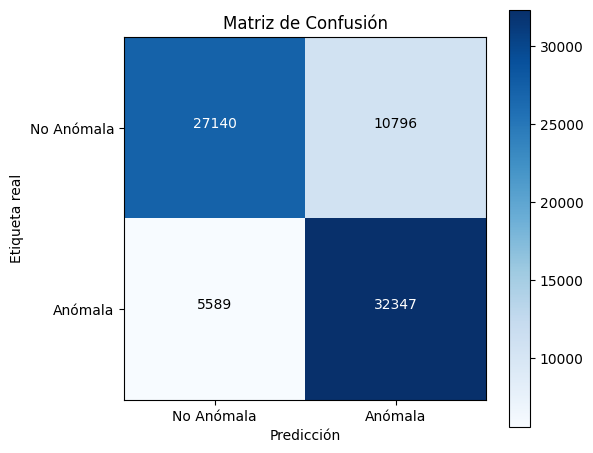

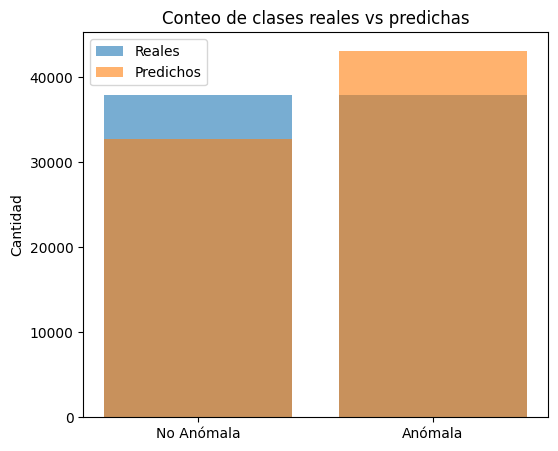

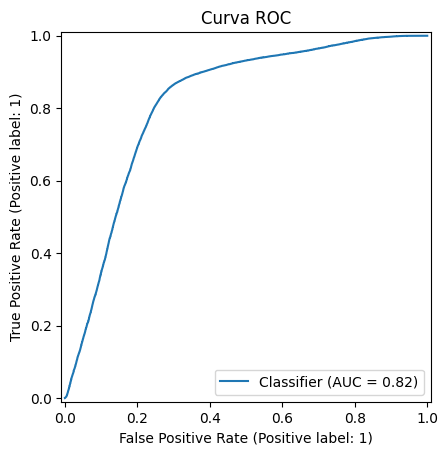

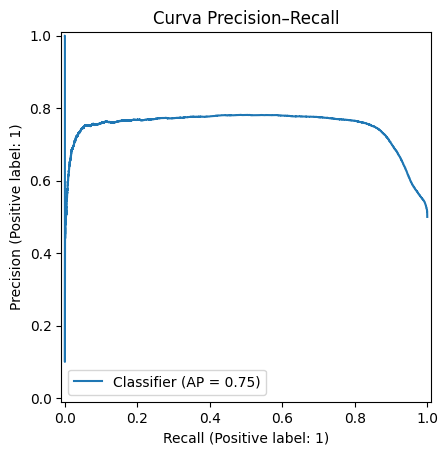

In [18]:
modelo_path = 'modelo_logistic_regression_binaria.pkl'
test_csv = 'Cloud_Anomaly_Dataset_Test_Balanceado_E.csv'

modelo, df_test = au.cargar_modelo_y_datos(modelo_path, test_csv)
X_test, y_test = au.preparar_X_y_test(modelo, df_test)
probs = au.calcular_probabilidades(modelo, X_test)
df_res, t_use, best_row = au.buscar_umbral_optimo(probs, y_test)
preds_final, df_out = au.guardar_metricas_y_predicciones(df_res, probs, y_test, t_use)
au.resumen_umbral(best_row, y_test, preds_final)
au.graficar_todo(modelo, X_test, y_test)

# DNN para detección de anomalías

El propósito de este modelo es ilustrar la aplicación práctica de técnicas de aprendizaje profundo supervisado para la detección de anomalías en entornos de cómputo en la nube, utilizando una Red Neuronal Profunda (DNN).

Para el desarrollo se empleó el conjunto de datos Cloud_Anomaly_Dataset, que contiene métricas de rendimiento de instancias virtuales como uso de CPU, memoria, tráfico de red, consumo energético y otros atributos derivados de la carga de trabajo y el estado de las tareas.

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

import limpieza_y_balanceoescalado as prep3
import dnn as dn
import analisis_umbral as au

%matplotlib inline

Se carga el conjunto de datos Cloud_Anomaly_Dataset, cuyo objetivo es detectar comportamientos anómalos en entornos de cómputo en la nube.

In [23]:
plt.ion()

df = pd.read_csv("Cloud_Anomaly_Dataset.csv")

print("Información del conjunto de datos Cloud_Anomaly_Dataset:\n")
print(df.info())

print("\nPrimeras filas del dataset:")
print(df.head())

Información del conjunto de datos Cloud_Anomaly_Dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277570 entries, 0 to 277569
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   vm_id                      249595 non-null  object 
 1   timestamp                  277570 non-null  object 
 2   cpu_usage                  250130 non-null  float64
 3   memory_usage               249775 non-null  float64
 4   network_traffic            249725 non-null  float64
 5   power_consumption          250018 non-null  float64
 6   num_executed_instructions  249637 non-null  float64
 7   execution_time             249960 non-null  float64
 8   energy_efficiency          249616 non-null  float64
 9   task_type                  249580 non-null  object 
 10  task_priority              249674 non-null  object 
 11  task_status                249621 non-null  object 
 12  Anomaly status             2

Se limpian y escalan los datos, y se genera un conjunto de entrenamiento balanceado a partir del dataset Cloud_Anomaly_Dataset. Para la evaluación, se utilizará el conjunto de prueba balanceado, que permite analizar el comportamiento del modelo cuando las clases están equilibradas.

In [24]:
df = prep3.cargar_y_limpieza("Cloud_Anomaly_Dataset.csv")
df = prep3.codificar_categoricas(df)
df = prep3.crear_variables_derivadas(df)
df = prep3.rellenar_nulos(df)
df = prep3.seleccionar_columnas(df)

X, y = prep3.dividir_X_y(df)
X_train, X_test, y_train, y_test = prep3.split_train_test(X, y)

X_train_scaled, X_test_scaled = prep3.escalar_variables(X_train, X_test)

print("NaNs en X_train_scaled:", X_train_scaled.isna().sum().sum())
print("NaNs en X_test_scaled:", X_test_scaled.isna().sum().sum())

print("Distribución en entrenamiento (sin balancear):")
print(y_train.value_counts())

X_train_res, y_train_res = prep3.balancear_dataset(X_train_scaled, y_train)
X_test_res, y_test_res = prep3.balancear_dataset(X_test_scaled, y_test)

print("Distribución en entrenamiento (balanceado):")
print(y_train_res.value_counts())
print("Distribución en test (balanceado):")
print(y_test_res.value_counts())

prep3.guardar_datasets_balanceados(
    X_train_res, y_train_res, X_test_res, y_test_res
)

print(f"X_train_res: {X_train_res.shape}, X_test_res: {X_test_res.shape}")
print("Proceso completado")

c:\Users\oscar\Downloads\Entrega\limpieza_y_balanceoescalado.py:10: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[col] = pd.to_datetime(df[col], errors='coerce')


NaNs en X_train_scaled: 0
NaNs en X_test_scaled: 0
Distribución en entrenamiento (sin balancear):
Anomaly status
0    151742
1      9785
Name: count, dtype: int64
Distribución en entrenamiento (balanceado):
Anomaly status
0    151742
1    151742
Name: count, dtype: int64
Distribución en test (balanceado):
Anomaly status
0    37936
1    37936
Name: count, dtype: int64

Archivos balanceados generados correctamente:
 - Cloud_Anomaly_Dataset_Train_Balanceado_E.csv
 - Cloud_Anomaly_Dataset_Test_Balanceado_E.csv
X_train_res: (303484, 24), X_test_res: (75872, 24)
Proceso completado


## Optimización de hiperparámetros de la DNN

Se utilizará la clase **KerasClassifier** de `scikeras.wrappers` para construir un modelo de **Red Neuronal Profunda (DNN)**.  
El modelo se entrenará con el conjunto de entrenamiento **balanceado** (`X_train`, `y_train`) y se evaluará con el conjunto de prueba **balanceado** (`X_test`, `y_test`).  
Para la optimización de hiperparámetros se emplea **GridSearchCV**, utilizando validación cruzada y la métrica **F1-score** como criterio de selección.

### Valores que se usaron en la búsqueda de hiperparámetros:

* `model__n_layers`: `[1, 3]`  
* `model__n_neurons`: `[10]`  
* `model__dropout_rate`: `[0.2]`  
* `model__lr` (learning rate): `[0.001, 0.0005]`  
* `epochs`: `[20]`  
* `batch_size`: `[32]`  

Nulos en X_train: 0
Nulos en X_test: 0
Buscando los mejores hiperparámetros...
Fitting 2 folds for each of 4 candidates, totalling 8 fits
Mejores parámetros encontrados: {'batch_size': 32, 'epochs': 20, 'model__dropout_rate': 0.2, 'model__lr': 0.0005, 'model__n_layers': 3, 'model__n_neurons': 10}
Mejor F1 en validación cruzada: 0.0869

--- Resultados del modelo ---
Accuracy: 0.7999
Matriz de confusión:
 [[27435 10501]
 [ 4682 33254]]
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.85      0.72      0.78     37936
           1       0.76      0.88      0.81     37936

    accuracy                           0.80     75872
   macro avg       0.81      0.80      0.80     75872
weighted avg       0.81      0.80      0.80     75872


Top variables según importancia:
                 Variable  Importancia
        energy_efficiency     0.280657
             status_ratio     0.017900
      task_status_running     0.016555
      task_status_

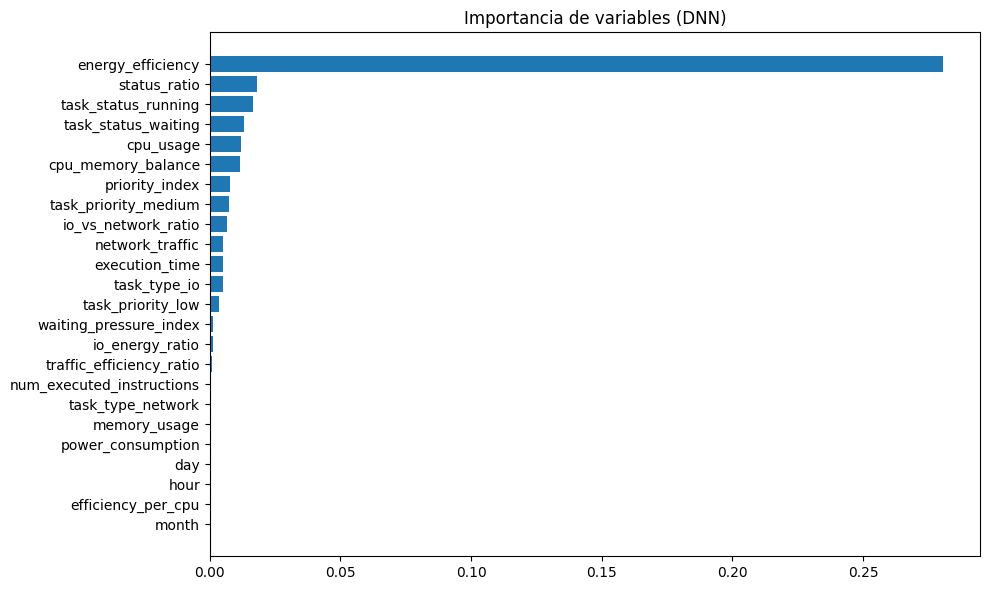

Modelo guardado como 'modelo_dnn_optimo.pkl'


In [27]:
X_train, X_test, y_train, y_test = dn.cargar_datasets(
    'Cloud_Anomaly_Dataset_Train_Balanceado_E.csv',
    'Cloud_Anomaly_Dataset_Test_Balanceado_E.csv'
)

print("Nulos en X_train:", X_train.isnull().sum().sum())
print("Nulos en X_test:", X_test.isnull().sum().sum())

best_dnn = dn.entrenar_dnn(X_train, y_train)
dn.evaluar_modelo(best_dnn, X_test, y_test)
dn.importancia_variables(best_dnn, X_train, y_train)
dn.guardar_modelo(best_dnn, nombre_archivo="modelo_dnn_optimo.pkl")

Para encontar el mejor RECALL en amabas clase se tiene el siguiente codigo:


====== RESUMEN DEL UMBRAL ÓPTIMO ======
Umbral seleccionado: 0.015
Accuracy: 0.7892
Precision: 0.7281
Recall clase 0 (No Anómala): 0.6553
Recall clase 1 (Anómala): 0.9231
----------------------------------------
Total de muestras: 75872
Anomalías predichas: 48095
No anomalías predichas: 27777
----------------------------------------
Reporte de clasificación:
              precision    recall  f1-score   support

  No Anómala       0.90      0.66      0.76     37936
     Anómala       0.73      0.92      0.81     37936

    accuracy                           0.79     75872
   macro avg       0.81      0.79      0.79     75872
weighted avg       0.81      0.79      0.79     75872

----------------------------------------
Matriz de confusión:
[[24861 13075]
 [ 2916 35020]]



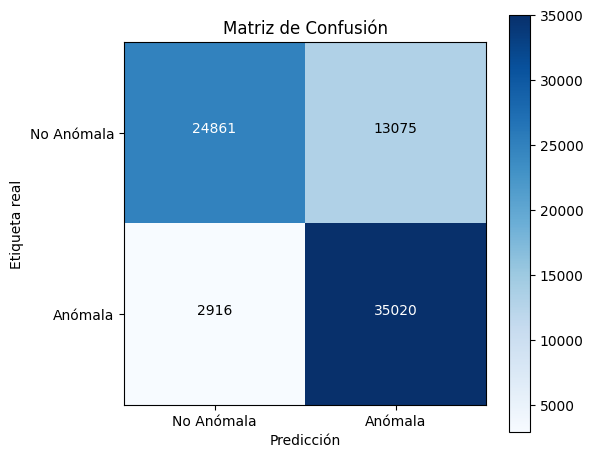

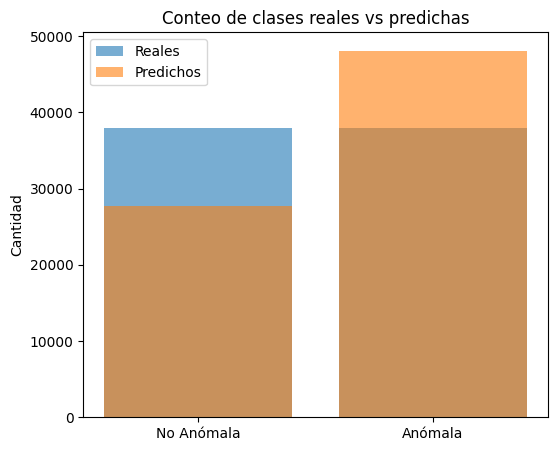

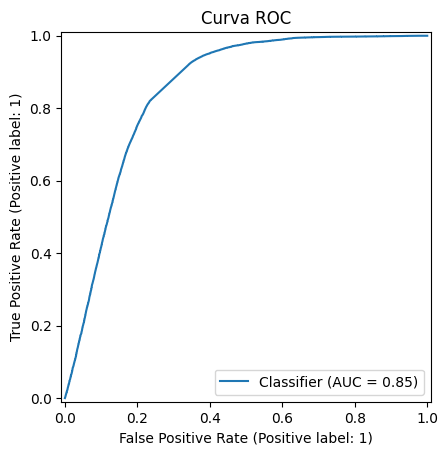

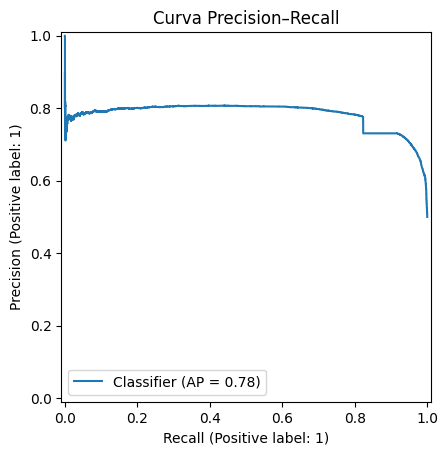

In [2]:
from dnn import crear_modelo
import joblib

modelo_path = 'modelo_dnn_optimo.pkl'
modelo = joblib.load(modelo_path)

test_csv = 'Cloud_Anomaly_Dataset_Test_Balanceado_E.csv'
df_test = pd.read_csv(test_csv)

X_test, y_test = au.preparar_X_y_test_dnn(df_test)
probs = au.calcular_probabilidades_dnn(modelo, X_test)

df_res, t_use, best_row = au.buscar_umbral_optimo(probs, y_test)
preds_final, df_out = au.guardar_metricas_y_predicciones(df_res, probs, y_test, t_use)
au.resumen_umbral(best_row, y_test, preds_final)
au.graficar_todo(modelo, X_test, y_test)
